***
<br>
<h1><center>Enterprise Data Science Bootcamp Project</center></h1>

***
<br>
<br>
<center><font size="7">Recommendation Engine</font></center>
<br>
<br>
<center><font size="6">Grupo J</font></center>
<br>
<br>
<center>Catarina Valente -- m20190868</center>
<center>Miguel Gaspar -- m20191428</center>
<center>Rita Barroso -- m20190905</center>
<center>Tomás Rêgo -- m20190791</center>

# Table of Contents

<br></br>

* [1. Business Challenge](#business-challenge)

* [2. Imports](#imports)

* [3. Exploratory Data Analysis](#exploratory-data-analysis)

    * [3.1: Data Description](#data-description)

    * [3.2: Data Cleaning](#data-cleaning)
   
        * [3.2.1: Missing Values](#missing-values)
        
        * [3.2.2 Data Consistency](#data-consistency)
        
        * [3.2.3. Data Quality](#data-quality)

        * [3.2.4: Outliers](#outliers)
        
        * [3.2.5: Data Visualization](#data-visualization)
 
* [4. Recommendation Algorithms](#recommendation-algorithms)

    * [4.1 Popularity Recommender](#popularity-recommender)
    
        * [4.1.1 Testing Popularity Recommender](#testing-popularity-recommender)
    
    * [4.2 User-Based Collaborative Filtering](#user-based-collaborative-filtering)
    
        * [4.2.1 User-Product Frequency Matrix](#user-product-frequency-matrix)
        
        * [4.2.2 User-User Similarity Matrix](#user-user-similarity-matrix)
        
        * [4.2.3 Testing User-Based Recommender](#testing-user-based-recommender)
        
            * [4.2.3.1 Worldwide Implementation](#worldwide-implementation)
            
            * [4.2.3.2 Regional Implementation](#regional-implementation)
        
* [5. Function Encapsulation](#function-encapsulation)

* [6. Concluding Remarks](#concluding-remarks)

<a class="anchor" id="business-challenge"></a>
# Business Challenge

Customer trust and satisfaction are paramount for any business. A satisfied customer will keep returning in the future and therefore will keep investing in the company. However, as the customer base and the company's catalog of products expand, it becomes harder to keep track of individual customer preferences. Moreover, it becomes more and more time-consuming and cost-prohibitive to market every product to every customer, and this approach can even turn customers away from the business.<br>

Recommender systems, also known as recommendation engines, can be used to address this issue. These systems work as filtering tools that analyze historical customer data to generate product recommendations custom-tailored to the customer's needs and preferences. Therefore, recommendation engines bring a variety of benefits for the company:

<br>

- **Product Exposure:** With a very large catalog of products, customers might not be able to be exposed to everything the company has to offer. With a recommender system in place, customers are exposed to products they might otherwise not see, thereby increasing the likelihood of sale of that product. This also keeps the customer interested in what the company has to offer, while also facilitating exposure of less popular products, helping to prevent stock accumulation.
<br>

- **Personalized Experience:** Product recommendations are custom-tailored to each customer according to their past preferences and needs. This means each customer gets its own personalized experience, which increases customer satisfaction, and a happy customer is more likely to recommend the company and its products to new, potential customers. 
<br>

- **Customer Engagement:** With detailed, customer-oriented recommendations, customers become more engaged with the company's content, and are more likely to explore different products. Together with their increased satisfaction, this effectively means that a well-built recommendation engine will increase customer retention.
<br>

- **Increased Revenue:** By serving customers suggestions of products they might actually be interested in or in need of, the company is more likely to convert those suggestions into effective sales, which means that the company's profit grows, while its customer base remains trusting and satisfied.
<br>

In this project, we aim is to implement a recommender system for a multi-national company in the healthcare sector, based on its customers' historical purchase data. Below we delineate our approach, which involves building and testing of a baseline popularity-based recommender, as well as a more personalized user-based collaborative filtering algorithm.

<a class="anchor" id="imports"></a>
# Imports

In [1]:
# Imports from the standard library.
import calendar
import datetime as dt
import itertools
import os
import warnings

# Imports from third party libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import pairwise_distances

# Suppress printing warnings.
warnings.filterwarnings('ignore')

<a class="anchor" id="exploratory-data-analysis"></a>
# Exploratory Data Analysis

The first step in any Data Science project is to become familiar with the data we are working with. To this end, the following chapter is dedicated to loading, exploring, cleaning, and ensure data consistency, so that the dataset can then be easily worked with in building the recommender system.

<a class="anchor" id="data-description"></a>
## Data Description

In [2]:
# Set path to data files.
data_path = r'C:\Users\Miguel\Desktop\virtual_envs\EDSA\Bootcamp\project\data'

In [3]:
# Fetch sales data.
stock_df = pd.read_csv(os.path.join(data_path, 'stock.csv'))
stock_df

,country_code,cac,product_code,month_code,invoiced_sales,volume_primary_units,inventory_cost
0,country_code_0,cac_0,product_code_0,190001.0,0,0,0
1,country_code_0,cac_0,product_code_1,190001.0,0,0,0
2,country_code_0,cac_0,product_code_2,190001.0,0,0,0
3,country_code_0,cac_0,product_code_3,190001.0,0,0,0
4,country_code_0,cac_0,product_code_4,190001.0,0,0,0
...,...,...,...,...,...,...,...
5199681,country_code_2,cac_9503,product_code_477,201804.0,"467,8",2.0,"258,38"
5199682,country_code_1,cac_9481,product_code_5669,190001.0,0,0.0,0
5199683,country_code_3,cac_9449,product_code_2004,201807.0,"142,8",1.0,"59,49356343168641"
5199684,country_code_3,cac_9449,product_code_3602,201902.0,"61,8",1.0,"11,888895417875398"


In [4]:
# Check data types in sales table.
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199686 entries, 0 to 5199685
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   country_code          object 
 1   cac                   object 
 2   product_code          object 
 3   month_code            float64
 4   invoiced_sales        object 
 5   volume_primary_units  object 
 6   inventory_cost        object 
dtypes: float64(1), object(6)
memory usage: 277.7+ MB


In [5]:
# Fetch product data.
product_master_df = pd.read_csv(os.path.join(data_path, 'product_master.csv'))
product_master_df

,bravo_ww_fran_name,bravo_fran_name,bravo_sub_fran_name,bravo_major_name,bravo_minor_name,product_code
0,bravo_ww_fran_name_0,bravo_fran_name_0,bravo_sub_fran_name_0,bravo_major_name_0,bravo_minor_name_0,product_code_0
1,bravo_ww_fran_name_1,bravo_fran_name_1,bravo_sub_fran_name_1,bravo_major_name_1,bravo_minor_name_1,product_code_1
2,bravo_ww_fran_name_2,bravo_fran_name_2,bravo_sub_fran_name_2,bravo_major_name_2,bravo_minor_name_2,product_code_2
3,bravo_ww_fran_name_2,bravo_fran_name_2,bravo_sub_fran_name_2,bravo_major_name_2,bravo_minor_name_2,product_code_3
4,bravo_ww_fran_name_0,bravo_fran_name_0,bravo_sub_fran_name_0,bravo_major_name_0,bravo_minor_name_0,product_code_4
...,...,...,...,...,...,...
24688,bravo_ww_fran_name_3,bravo_fran_name_16,bravo_sub_fran_name_19,bravo_major_name_22,bravo_minor_name_17,product_code_24688
24689,bravo_ww_fran_name_3,bravo_fran_name_16,bravo_sub_fran_name_19,bravo_major_name_22,bravo_minor_name_17,product_code_24689
24690,bravo_ww_fran_name_3,bravo_fran_name_16,bravo_sub_fran_name_19,bravo_major_name_22,bravo_minor_name_17,product_code_24690
24691,bravo_ww_fran_name_3,bravo_fran_name_16,bravo_sub_fran_name_19,bravo_major_name_22,bravo_minor_name_17,product_code_24691


In [6]:
# Check data types in products table.
product_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24693 entries, 0 to 24692
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bravo_ww_fran_name   24693 non-null  object
 1   bravo_fran_name      24693 non-null  object
 2   bravo_sub_fran_name  24693 non-null  object
 3   bravo_major_name     24693 non-null  object
 4   bravo_minor_name     24693 non-null  object
 5   product_code         24693 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [7]:
# Summarize product data.
product_master_df.describe()

,bravo_ww_fran_name,bravo_fran_name,bravo_sub_fran_name,bravo_major_name,bravo_minor_name,product_code
count,24693,24693,24693,24693,24693,24693
unique,9,32,40,111,414,24693
top,bravo_ww_fran_name_3,bravo_fran_name_13,bravo_sub_fran_name_5,bravo_major_name_5,bravo_minor_name_3,product_code_4360
freq,17853,6053,4249,4249,4642,1


<a class="anchor" id="data-cleaning"></a>
## Data Cleaning

<a class="anchor" id="missing-values"></a>
### Missing Values

Missing values represent entries in a dataset for which no information was available, or was otherwise incorrectly entered. Such values are problematic because they can skew calculations, and many models are unable to ingest missing values in order to work properly. The most common ways to treat missing values is to drop all records containing missing values, or to replace the missing values some other value.

In [8]:
# Check missing values in sales table.
for column in stock_df.columns:
    print(column + ':', stock_df[column].isna().sum(), '\n')

country_code: 0 

cac: 0 

product_code: 0 

month_code: 1 

invoiced_sales: 1 

volume_primary_units: 1 

inventory_cost: 1 



In [9]:
# Check which record(s) in the sales table has missing values.
stock_df.loc[stock_df['month_code'].isnull()]

,country_code,cac,product_code,month_code,invoiced_sales,volume_primary_units,inventory_cost
5199685,country_code_3,cac_9501,product_code_57985,NaN,NaN,NaN,NaN


In [10]:
# Remove the record with missing values.
stock_df.dropna(inplace=True)

stock_df

,country_code,cac,product_code,month_code,invoiced_sales,volume_primary_units,inventory_cost
0,country_code_0,cac_0,product_code_0,190001.0,0,0,0
1,country_code_0,cac_0,product_code_1,190001.0,0,0,0
2,country_code_0,cac_0,product_code_2,190001.0,0,0,0
3,country_code_0,cac_0,product_code_3,190001.0,0,0,0
4,country_code_0,cac_0,product_code_4,190001.0,0,0,0
...,...,...,...,...,...,...,...
5199680,country_code_2,cac_9503,product_code_1679,201807.0,"913,52",288.0,"184,1846054410373"
5199681,country_code_2,cac_9503,product_code_477,201804.0,"467,8",2.0,"258,38"
5199682,country_code_1,cac_9481,product_code_5669,190001.0,0,0.0,0
5199683,country_code_3,cac_9449,product_code_2004,201807.0,"142,8",1.0,"59,49356343168641"


In [11]:
# Check missing values in products table.
for column in product_master_df.columns:
    print(column + ':', product_master_df[column].isna().sum(), '\n')

bravo_ww_fran_name: 0 

bravo_fran_name: 0 

bravo_sub_fran_name: 0 

bravo_major_name: 0 

bravo_minor_name: 0 

product_code: 0 



<a class="anchor" id="data-consistency"></a>
### Data Consistency

Data consistency concerns itself with making sure that each field in the dataset has the same, correct data type, as well as consistent formatting.

In [12]:
# Check odd values for "volume_primary_units": strings, with commas in them, disguised as decimal values.
for value in stock_df['volume_primary_units']:
    if isinstance(value, str) and ',' in value:
        print(value, type(value))
        # Since units sold should be integers, and given that these weird values are very few, we can discard them.
        stock_df = stock_df[stock_df['volume_primary_units'] != value]

3,5 <class 'str'>
10,333 <class 'str'>
2,167 <class 'str'>
10,667 <class 'str'>
6,33 <class 'str'>
2,167 <class 'str'>
1,167 <class 'str'>
19,333 <class 'str'>
8,75 <class 'str'>
12,333 <class 'str'>
73,167 <class 'str'>
191,167 <class 'str'>
2,33 <class 'str'>
0,667 <class 'str'>


In [13]:
# Check that we have indeed been successful in removing the odd values for "volume_primary_units".
for value in stock_df['volume_primary_units']:
    if isinstance(value, str) and ',' in value:
        print(value, type(value))

In [14]:
# In any column with codes in it, we only need the last digit of the code, since that is the real unique identiier
# for that code. Moreover, using only the last digit, we can convert the column from string to integer,
# which is better for performance and doing any kind of mathematical operations.
columns_to_change = ['country_code',
                     'cac',
                     'product_code',
                     'bravo_ww_fran_name',
                     'bravo_fran_name',
                     'bravo_sub_fran_name',
                     'bravo_major_name',
                     'bravo_minor_name'
                    ]

for column in columns_to_change:
    if column in stock_df.columns:
        stock_df[column] = stock_df[column].apply(lambda x: x.split('_')[-1]).astype(int)
    if column in product_master_df.columns:
        product_master_df[column] = product_master_df[column].apply(lambda x: x.split('_')[-1]).astype(int)

# Convert column to data type string and then to date format.
stock_df['month_code'] = stock_df['month_code'].apply(lambda x: str(x)[:-2])
stock_df['month_code'] = stock_df['month_code'].apply(lambda x: dt.datetime(year=int(x[0:4]),
                                                                            month=int(x[4:6]),
                                                                            day=1
                                                                           ))

# Convert the sales, volume, and costs columns to numeric type, rounded with 2 decimal places.
stock_df['invoiced_sales'] = stock_df['invoiced_sales'].apply(lambda x: round(float(x.replace(',', '.')), 2))
stock_df['volume_primary_units'] = stock_df['volume_primary_units'].apply(lambda x: int(float(str(x))))
stock_df['inventory_cost'] = stock_df['inventory_cost'].apply(lambda x: round(float(x.replace(',', '.')), 2))

# Inspect the newly formatted table.
stock_df

,country_code,cac,product_code,month_code,invoiced_sales,volume_primary_units,inventory_cost
0,0,0,0,1900-01-01,0.00,0,0.00
1,0,0,1,1900-01-01,0.00,0,0.00
2,0,0,2,1900-01-01,0.00,0,0.00
3,0,0,3,1900-01-01,0.00,0,0.00
4,0,0,4,1900-01-01,0.00,0,0.00
...,...,...,...,...,...,...,...
5199680,2,9503,1679,2018-07-01,913.52,288,184.18
5199681,2,9503,477,2018-04-01,467.80,2,258.38
5199682,1,9481,5669,1900-01-01,0.00,0,0.00
5199683,3,9449,2004,2018-07-01,142.80,1,59.49


In [15]:
# Check data types have been correctly assigned.
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5199671 entries, 0 to 5199684
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   country_code          int32         
 1   cac                   int32         
 2   product_code          int32         
 3   month_code            datetime64[ns]
 4   invoiced_sales        float64       
 5   volume_primary_units  int64         
 6   inventory_cost        float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1)
memory usage: 257.9 MB


<a class="anchor" id="data-quality"></a>
### Data Quality

With missing values removed and data types correctly attributed and formatted, we can now explore the data further and query the dataset for records that simply don't make any business sense, i.e., records where costs are higher than sales price, negative values, and so on.

In [16]:
# Create a copy of the previous table, then drop all records where the year is 1900
# (i.e., records for which we don't have any sales information).
clean_stocks = stock_df.copy()
clean_stocks = clean_stocks[clean_stocks['month_code'].dt.year!=1900]
clean_stocks.rename(columns={'cac': 'customer_id', 'volume_primary_units': 'units_sold'}, inplace=True)
clean_stocks

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
20,0,3,20,2018-04-01,95.10,4,24.41
21,0,3,21,2019-06-01,0.00,0,0.00
22,0,3,22,2019-02-01,-773.62,-1,-236.55
23,0,3,23,2018-12-01,375.42,6,108.94
24,0,3,24,2018-04-01,9.40,1,6.69
...,...,...,...,...,...,...,...
5199679,2,9503,12830,2018-10-01,78.95,5,34.09
5199680,2,9503,1679,2018-07-01,913.52,288,184.18
5199681,2,9503,477,2018-04-01,467.80,2,258.38
5199683,3,9449,2004,2018-07-01,142.80,1,59.49


In [17]:
# Checking where any of Sales, Units, or Costs (or any combination of them) are 0.
clean_stocks[(clean_stocks['invoiced_sales'] == 0) |
             (clean_stocks['units_sold'] == 0) |
             (clean_stocks['inventory_cost'] == 0)
            ]

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
21,0,3,21,2019-06-01,0.00,0,0.00
51,0,5,50,2019-03-01,50.04,1,0.00
61,0,6,60,2018-07-01,0.00,0,0.00
64,0,6,63,2018-07-01,-2.25,0,0.00
167,0,3,163,2019-01-01,0.00,0,0.00
...,...,...,...,...,...,...,...
5199644,2,9437,21219,2019-02-01,0.00,2,257.54
5199657,3,9426,700,2019-05-01,0.00,0,0.00
5199658,3,9422,1447,2018-12-01,0.00,0,0.00
5199661,3,8727,2501,2018-06-01,0.00,0,0.00


In [18]:
# Removing those records.
clean_stocks = clean_stocks[(clean_stocks['invoiced_sales']!= 0) &
                            (clean_stocks['units_sold']!= 0) &
                            (clean_stocks['inventory_cost']!= 0)
                           ]

clean_stocks

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
20,0,3,20,2018-04-01,95.10,4,24.41
22,0,3,22,2019-02-01,-773.62,-1,-236.55
23,0,3,23,2018-12-01,375.42,6,108.94
24,0,3,24,2018-04-01,9.40,1,6.69
25,0,3,25,2018-07-01,169.49,2,24.81
...,...,...,...,...,...,...,...
5199679,2,9503,12830,2018-10-01,78.95,5,34.09
5199680,2,9503,1679,2018-07-01,913.52,288,184.18
5199681,2,9503,477,2018-04-01,467.80,2,258.38
5199683,3,9449,2004,2018-07-01,142.80,1,59.49


In [19]:
# Checking where Costs are higher than Sales.
clean_stocks[clean_stocks['inventory_cost'] > clean_stocks['invoiced_sales']]

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
22,0,3,22,2019-02-01,-773.62,-1,-236.55
37,0,3,36,2019-06-01,-105.32,-1,-51.50
44,0,3,43,2019-05-01,-845.48,-2,-357.43
46,0,3,45,2019-05-01,-758.61,-2,-196.34
185,0,3,178,2018-07-01,52.24,2,81.52
...,...,...,...,...,...,...,...
5199599,2,9614,1356,2018-04-01,-101.15,-1,-42.54
5199604,2,9486,9522,2018-03-01,-224.48,-8,-124.12
5199639,2,9102,5449,2018-12-01,309.06,18,356.72
5199655,1,9321,6703,2019-05-01,15.52,1,16.63


In [20]:
# Removing those records.
clean_stocks = clean_stocks[clean_stocks['inventory_cost'] <= clean_stocks['invoiced_sales']]

clean_stocks

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
20,0,3,20,2018-04-01,95.10,4,24.41
23,0,3,23,2018-12-01,375.42,6,108.94
24,0,3,24,2018-04-01,9.40,1,6.69
25,0,3,25,2018-07-01,169.49,2,24.81
26,0,3,26,2018-04-01,169.49,2,22.13
...,...,...,...,...,...,...,...
5199679,2,9503,12830,2018-10-01,78.95,5,34.09
5199680,2,9503,1679,2018-07-01,913.52,288,184.18
5199681,2,9503,477,2018-04-01,467.80,2,258.38
5199683,3,9449,2004,2018-07-01,142.80,1,59.49


In [21]:
# Checking Where Sales AND Costs are negative.
clean_stocks[(clean_stocks['invoiced_sales'] < 0) |
             (clean_stocks['inventory_cost'] < 0)
            ]

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
864,0,9,708,2019-06-01,-192.22,-3,-414.57
5232,0,25,2380,2018-07-01,-28.81,-12,-31.63
11622,0,24,3773,2019-04-01,244.64,-1,-76.90
12450,0,7,2380,2018-04-01,-28.75,-12,-31.63
12991,0,29,3886,2018-03-01,-114.49,-4,-136.34
...,...,...,...,...,...,...,...
5192496,2,9624,23259,2018-03-01,-87.23,-8,-91.39
5193723,2,9349,14614,2018-02-01,-34.32,-36,-47.60
5197559,2,9160,40289,2018-09-01,-248.77,-4,-289.48
5197850,2,9425,39617,2018-02-01,-39.26,-1,-39.91


In [22]:
# Removing those records.
clean_stocks = clean_stocks[(clean_stocks['invoiced_sales'] > 0) &
                            (clean_stocks['inventory_cost'] > 0)
                           ]

# Reset the indices.
clean_stocks.reset_index(inplace=True, drop=True)

clean_stocks

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
0,0,3,20,2018-04-01,95.10,4,24.41
1,0,3,23,2018-12-01,375.42,6,108.94
2,0,3,24,2018-04-01,9.40,1,6.69
3,0,3,25,2018-07-01,169.49,2,24.81
4,0,3,26,2018-04-01,169.49,2,22.13
...,...,...,...,...,...,...,...
4110765,2,9503,12830,2018-10-01,78.95,5,34.09
4110766,2,9503,1679,2018-07-01,913.52,288,184.18
4110767,2,9503,477,2018-04-01,467.80,2,258.38
4110768,3,9449,2004,2018-07-01,142.80,1,59.49


<a class="anchor" id="outliers"></a>
### Outliers

Outliers are records whose features take extreme values. When those features are too extreme, they can misrepresent the population we are trying to study, by skewing calculations and model outputs (many models are sensitive to outliers). In those cases, the best remedy is to employ any statistical method that removes those outlier observations from the dataset. On the hand, however, depending on the business case, outliers might be unexpected sources of information, that can point to rare or infrequent events or classes that are nevertheless important to take into account (such as power outages, or big spending customers). Because of this, outliers must be judiciously investigated and treated.

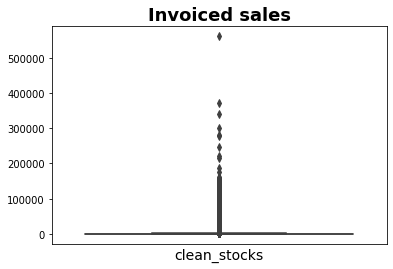

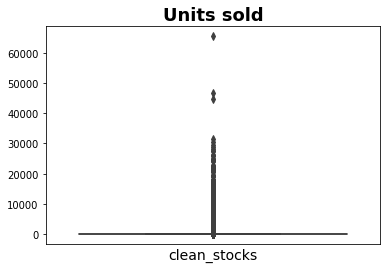

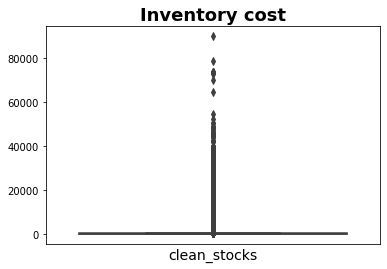

In [23]:
# Set which columns to inspect for outliers.
columns_to_inspect = ['invoiced_sales', 'units_sold', 'inventory_cost']

for column in columns_to_inspect:
    
    # Initialize the figure.
    fig, ax = plt.subplots()
    
    # Create the boxplot.
    sns.boxplot(data=clean_stocks[column])
    
    # Figure formatting.
    ax.set_title(' '.join(column.split('_')).capitalize(), size=18, weight='bold')
    ax.set_xlabel('clean_stocks', size=14)
    ax.set_xticks([])
    ax.set_xticklabels([])
    
    plt.show()
    plt.close()

In [24]:
# Inspect potential outlier values.
clean_stocks[clean_stocks['invoiced_sales'] > 200000]

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
88380,2,136,15134,2018-12-01,299990.00,1,35191.66
739222,2,626,8600,2018-06-01,221314.00,2,78687.60
1179629,0,2089,261,2018-03-01,370856.81,847,72553.64
1231576,0,2089,261,2019-02-01,215675.59,492,42144.50
1848952,3,3502,34711,2018-05-01,245356.03,1,1.00
1900345,0,3659,1042,2019-03-01,339595.85,9120,21140.81
2559541,3,5384,34711,2018-05-01,281107.80,1,1.00
2920601,2,6670,29869,2018-03-01,276519.33,25,0.25
3000791,3,6667,34711,2018-05-01,561781.05,1,1.00


In [25]:
# Inspect potential outlier values.
clean_stocks[clean_stocks['units_sold'] > 40000]

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
1894081,0,3659,839,2019-03-01,143459.22,44928,42710.92
1898425,0,3659,211,2019-02-01,128512.81,65664,37454.19
1979100,0,3659,1419,2019-02-01,154434.03,46800,54197.56


In [26]:
# Inspect potential outlier values.
clean_stocks[clean_stocks['inventory_cost'] > 60000]

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost
739222,2,626,8600,2018-06-01,221314.00,2,78687.60
1179629,0,2089,261,2018-03-01,370856.81,847,72553.64
1857274,0,3659,243,2019-03-01,110854.59,7248,89783.08
1938485,0,3659,1431,2019-03-01,139544.52,740,64528.56
2160173,1,4427,25523,2018-02-01,133560.00,2,73360.26
2186730,1,4427,25523,2018-12-01,133560.00,2,73360.26
2262193,1,4427,25523,2018-11-01,133560.00,2,73360.26
2436163,3,5102,904,2018-03-01,149380.00,1940,69820.60
2500222,1,5066,25523,2018-12-01,133560.00,2,73360.26


- **Takeaway**
<br>

From the boxplots above, we can see that there tend to be some outliers across invoiced sales, units sold, and production cost. However, upon closer inspection of the data, we can see that for all three categories, the corresponding records regard either sales of single or few very expensive products, or a lot of cheaper products. Since both cases are natural occurrences in the current business context (machinery and equipment can be very expensive, while cheap consumables can be bought in bulk), and they may also correspond to customers with a higher product demand and/or purchase capacity, we decided to not remove these outlying records, and proceed with the data as is.

**Note:** Now that we have treated and cleaned the data in both input tables, and are satisfied with its quality, we can merge them both into a single table for ease of manipulation and cross-reference. We will use a left join to merge the sales table, on the left, with the product table on the right, since we want to preserve all transaction data. We do note that by performing this merge we are excluding from the sales table transactions involving products that are *NOT* listed in the product table. However, since the purpose of the current project is the development of a product recommender, we feel it is important to retain only those records for which we have both customer purchase data as well as the corresponding product data. Any transactions without associated product data would essentially be useless in this respect.

In [27]:
# Merge the sales and products tables together (by performing an inner join on the "product_code" column,
# which is present in both tables).
sales_df = pd.merge(left=clean_stocks, right=product_master_df, on='product_code', how='inner')
sales_df

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost,bravo_ww_fran_name,bravo_fran_name,bravo_sub_fran_name,bravo_major_name,bravo_minor_name
0,0,3,20,2018-04-01,95.10,4,24.41,0,0,0,0,0
1,0,3,20,2018-06-01,23.77,1,6.10,0,0,0,0,0
2,0,8,20,2019-04-01,63.50,2,12.15,0,0,0,0,0
3,0,5,20,2018-04-01,16.51,1,6.10,0,0,0,0,0
4,2,285,20,2018-02-01,52.64,5,30.51,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3897163,2,9469,24355,2018-12-01,180.50,4,43.06,3,13,14,16,3
3897164,2,9617,23181,2018-03-01,641.13,3,112.99,3,5,5,5,3
3897165,2,9666,22727,2018-03-01,148.73,36,48.85,3,13,15,17,82
3897166,3,9323,23913,2018-05-01,725.00,1,502.78,3,11,11,31,58


<a class="anchor" id="data-visualization"></a>
### Data Visualization

Here we will aggregate and visualize relevant sections of the dataset to get a better understanding of the underlying data.

In [28]:
# Get some general information about the company's sales.
n_countries = sales_df['country_code'].nunique()
n_customers = sales_df['customer_id'].nunique()
n_total_products = product_master_df['product_code'].nunique()
n_sold_products = sales_df['product_code'].nunique()
percent_catalog_sold = round(n_sold_products / n_total_products * 100, 2)

# Printing out the gathered information.
print('Number of countries the company has made sales in:                    ' + str(n_countries))
print('Number of customers registered with the company:                      ' + str(n_customers))
print("Number of total products in the company's catalog:                    " + str(n_total_products))
print("Number of products in the company's catalog that have been sold:      " + str(n_sold_products))
print("Percentage of products in the company's catalog that have been sold:  " + str(percent_catalog_sold) + '%')

Number of countries the company has made sales in:                    4
Number of customers registered with the company:                      7121
Number of total products in the company's catalog:                    24693
Number of products in the company's catalog that have been sold:      22031
Percentage of products in the company's catalog that have been sold:  89.22%


#### Product Perspective

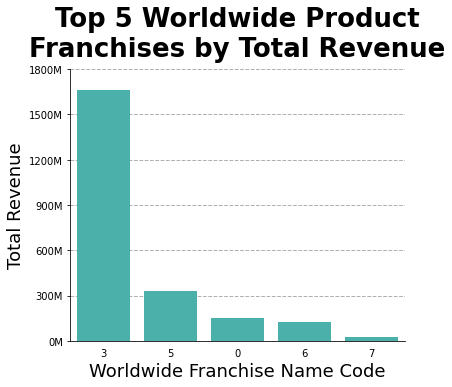

In [29]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('bravo_ww_fran_name').sum()[['invoiced_sales']]
temp_df = temp_df / 1000000 # Dividing by a million so we can rescale the figure.
temp_df = temp_df.sort_values(by='invoiced_sales', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='invoiced_sales',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Worldwide Product\nFranchises by Total Revenue', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Worldwide Franchise Name Code', fontsize=18)
ax.set_ylabel('Total Revenue', fontsize=18)
ax.set_ylim(0, 1800)
ax.set_yticks(range(0, 1800+1, 300))
ax.set_yticklabels([str(int(label)) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

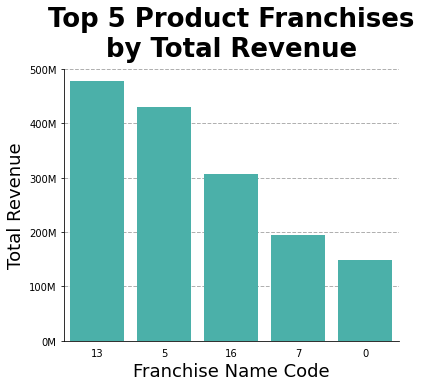

In [30]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('bravo_fran_name').sum()[['invoiced_sales']]
temp_df = temp_df / 1000000 # Dividing by a million so we can rescale the figure.
temp_df = temp_df.sort_values(by='invoiced_sales', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='invoiced_sales',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Product Franchises\nby Total Revenue', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Franchise Name Code', fontsize=18)
ax.set_ylabel('Total Revenue', fontsize=18)
ax.set_ylim(0,500)
ax.set_yticks(range(0, 500+1, 100))
ax.set_yticklabels([str(int(label)) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

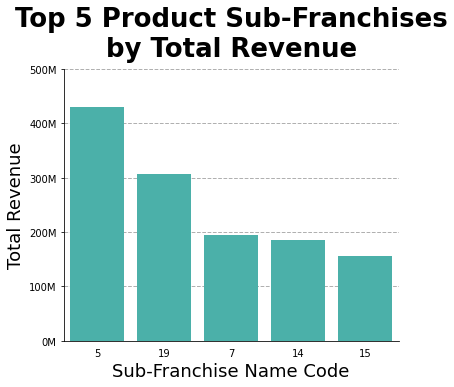

In [31]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('bravo_sub_fran_name').sum()[['invoiced_sales']]
temp_df = temp_df / 1000000 # Dividing by a million so we can rescale the figure.
temp_df = temp_df.sort_values(by='invoiced_sales', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='invoiced_sales',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Product Sub-Franchises\nby Total Revenue', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Sub-Franchise Name Code', fontsize=18)
ax.set_ylabel('Total Revenue', fontsize=18)
ax.set_ylim(0,500)
ax.set_yticks(range(0, 500+1, 100))
ax.set_yticklabels([str(int(label)) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

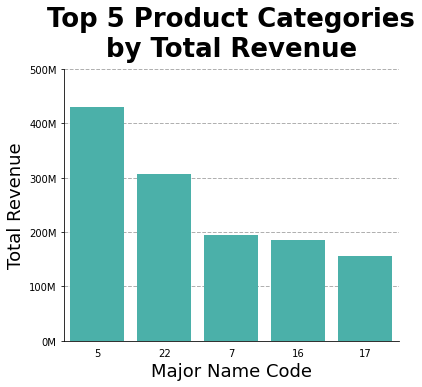

In [32]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('bravo_major_name').sum()[['invoiced_sales']]
temp_df = temp_df / 1000000 # Dividing by a million so we can rescale the figure.
temp_df = temp_df.sort_values(by='invoiced_sales', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='invoiced_sales',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Product Categories\nby Total Revenue', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Major Name Code', fontsize=18)
ax.set_ylabel('Total Revenue', fontsize=18)
ax.set_ylim(0,500)
ax.set_yticks(range(0, 500+1, 100))
ax.set_yticklabels([str(int(label)) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

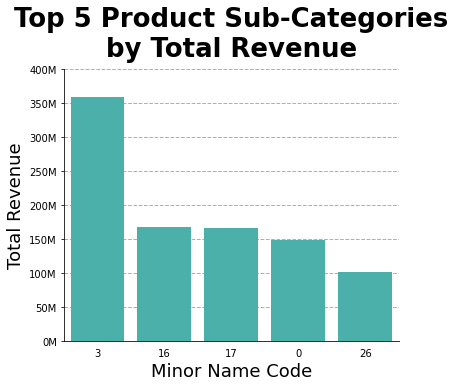

In [33]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('bravo_minor_name').sum()[['invoiced_sales']]
temp_df = temp_df / 1000000 # Dividing by a million so we can rescale the figure.
temp_df = temp_df.sort_values(by='invoiced_sales', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='invoiced_sales',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Product Sub-Categories\nby Total Revenue', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Minor Name Code', fontsize=18)
ax.set_ylabel('Total Revenue', fontsize=18)
ax.set_ylim(0, 400)
ax.set_yticks(range(0, 400+1, 50))
ax.set_yticklabels([str(int(label)) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

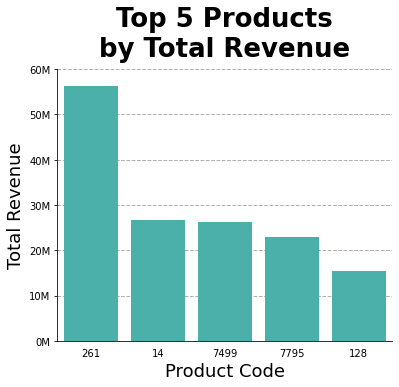

In [34]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('product_code').sum()[['invoiced_sales']]
temp_df = temp_df / 1000000 # Dividing by a million so we can rescale the figure.
temp_df = temp_df.sort_values(by='invoiced_sales', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='invoiced_sales',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Products\nby Total Revenue', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Product Code', fontsize=18)
ax.set_ylabel('Total Revenue', fontsize=18)
ax.set_ylim(0, 60)
ax.set_yticks(range(0, 60+1, 10))
ax.set_yticklabels([str(int(label)) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

- **Takeaway**
<br>

Across all product levels, even within the top five, there are clear major players, such as, for instance, worldwide franchise 3, sub-category 3, and product code 261.

#### Country Perspective

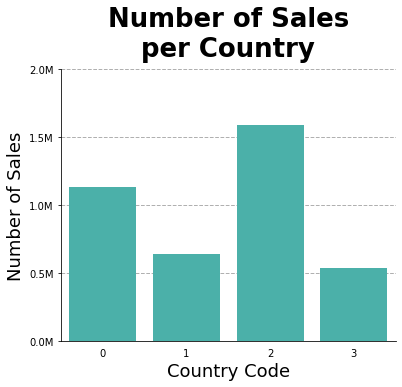

In [35]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('country_code').count()[['product_code']]
temp_df = temp_df / 1000000 #Dividing by a million so we can rescale the figure.

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='product_code',
            data=temp_df,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Number of Sales\nper Country', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Country Code', fontsize=18)
ax.set_ylabel('Number of Sales', fontsize=18)
ax.set_ylim(0, 2)
ax.set_yticks(np.arange(0, 2+0.1, 0.5))
ax.set_yticklabels([str(label) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

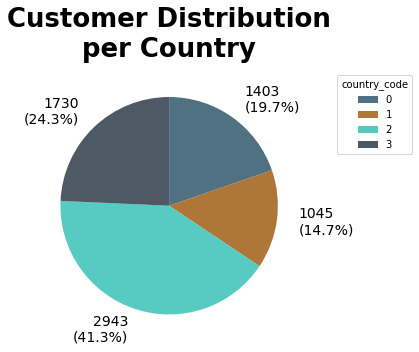

In [36]:
# create data
summed_values = sum(sales_df.groupby('country_code')[['customer_id']].nunique().values.flatten())
fractions = sales_df.groupby('country_code')[['customer_id']].nunique().values.flatten() / summed_values

wedge_labels = [str(int(f * summed_values)) + '\n(' + str(round(f * 100, 1)) + '%)' for f in fractions]
wedge_sizes = sales_df.groupby('country_code')[['customer_id']].nunique().values.flatten()
wedge_colors = ['#32596D', '#A25F18', '#3AC1B7', '#303D4C']

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the pie chart.
plt.pie(x=wedge_sizes,
        labels=wedge_labels,
        colors=wedge_colors,
        counterclock=False,
        startangle=90,
        labeldistance=1.2,
        wedgeprops={'alpha': 0.85},
        textprops={'size': 14}
       )

# Figure formatting.
sns.despine()
ax.set_title('Customer Distribution\nper Country', fontsize=26, fontweight='bold', y=1.025)
ax.legend(labels=list(range(4)), title='country_code', bbox_to_anchor=(1.1, 1))

plt.show()
plt.close()

- **Takeaway**
<br>

The majority of the customer base is located in country 2 (41,3%), followed by country 3 (24,3%), country 0 (19,7%), and lastly country 1 (14,7%). The majority of sales occur in country 2, where most of the customers are located, and country 0.

#### Customer Perspective

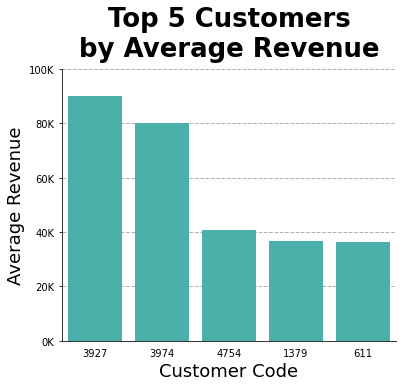

In [37]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('customer_id').mean()[['invoiced_sales']]
temp_df = temp_df / 1000 # Dividing by a thousand so we can rescale the figure.
temp_df = temp_df.sort_values(by='invoiced_sales', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='invoiced_sales',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Customers\nby Average Revenue', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Customer Code', fontsize=18)
ax.set_ylabel('Average Revenue', fontsize=18)
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 100+1, 20))
ax.set_yticklabels([str(int(label)) + 'K' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

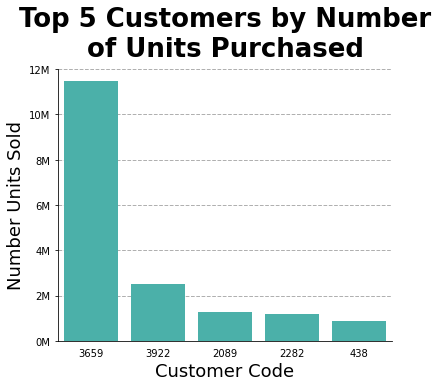

In [38]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('customer_id').sum()[['units_sold']]
temp_df = temp_df / 1000000 # Dividing by a million so we can rescale the figure.
temp_df = temp_df.sort_values(by='units_sold', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='units_sold',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Customers by Number\nof Units Purchased', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Customer Code', fontsize=18)
ax.set_ylabel('Number Units Sold', fontsize=18)
ax.set_ylim(0, 12)
ax.set_yticks(range(0, 12+1, 2))
ax.set_yticklabels([str(int(label)) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

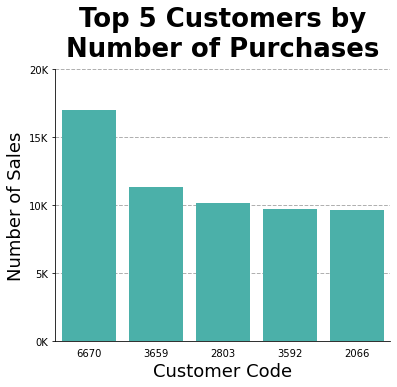

In [39]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('customer_id').count()[['product_code']]
temp_df = temp_df / 1000 # Dividing by a thousand so we can rescale the figure.
temp_df = temp_df.sort_values(by='product_code', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='product_code',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Customers by\nNumber of Purchases', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Customer Code', fontsize=18)
ax.set_ylabel('Number of Sales', fontsize=18)
ax.set_ylim(0, 20)
ax.set_yticks(range(0, 20+1, 5))
ax.set_yticklabels([str(int(label)) + 'K' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

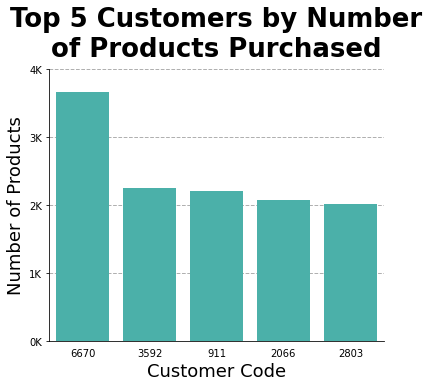

In [40]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('customer_id')[['product_code']].nunique()
temp_df = temp_df / 1000 # Dividing by a thousand so we can rescale the figure.
temp_df = temp_df.sort_values(by='product_code', ascending=False)[:5]

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x=temp_df.index,
            y='product_code',
            data=temp_df,
            order=temp_df.index,
            color='#3AC1B7',
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Top 5 Customers by Number\nof Products Purchased', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Customer Code', fontsize=18)
ax.set_ylabel('Number of Products', fontsize=18)
ax.set_ylim(0, 4)
ax.set_yticks(range(0, 4+1, 1))
ax.set_yticklabels([str(int(label)) + 'K' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

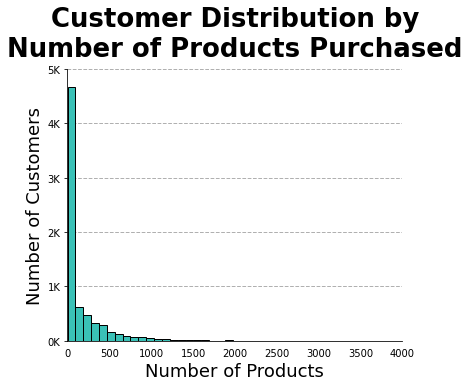

In [41]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby('customer_id')[['product_code']].nunique()

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.distplot(a=temp_df,
             bins=39,
             kde=False,
             color='#3AC1B7',
             hist_kws={'edgecolor': 'black', 'alpha': 1, 'zorder': 3}
            )

# Figure formatting.
sns.despine()
ax.set_title('Customer Distribution by\nNumber of Products Purchased', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Number of Products', fontsize=18)
ax.set_xlim(0, 4000)
ax.set_ylabel('Number of Customers', fontsize=18)
ax.set_ylim(0, 5000)
ax.set_yticks(range(0, 5000+1, 1000))
ax.set_yticklabels([str(label)[0] + 'K' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.

plt.show()
plt.close()

- **Takeaway**
<br>

Across all four measures, despite the fact that the top fives were populated by different customers, there is always one to two customers that rise far above the rest. These are potentially frequent, big spenders that could potentially be targeted in future marketing campaigns to increase the likelihood of retention of these customers. This is, however, outside the scope of this project. Furthermore, from the histogram, we can surmise that indeed the majority of the customer base buys only a few different products (between 1 and 100 products, as seen by the first bar), with only a very few select customers buying a wide variety of products.

#### Time Perspective

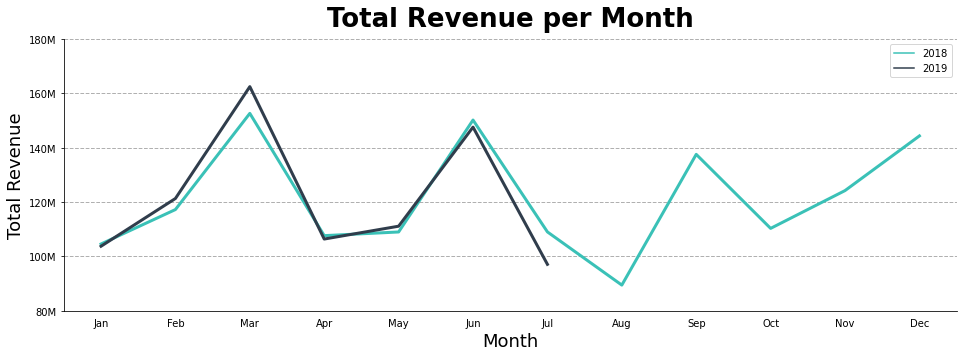

In [42]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby([sales_df['month_code'].dt.year, sales_df['month_code'].dt.month]).sum()[['invoiced_sales']]
temp_df = temp_df / 1000000 # Dividing by a million so we can rescale the figure.
temp_df.index.names = ['year', 'month']
temp_df.reset_index(inplace=True)

# Initialize figure.
fig, ax = plt.subplots(figsize=(16, 5))

# Create the lineplot.
sns.lineplot(x='month',
             y='invoiced_sales',
             data=temp_df,
             hue='year',
             hue_order=[2018, 2019],
             palette=['#3AC1B7', '#303D4C'],
             linewidth=3,
             zorder=3
            )

# Figure formatting.
sns.despine()
ax.set_title('Total Revenue per Month', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Month', fontsize=18)
ax.set_xlim(0.5, 12.5)
ax.set_xticks(np.arange(1, 12+1, 1))
ax.set_xticklabels([calendar.month_abbr[label] for label in ax.get_xticks()]) # Replace number by the corresponding month names.
ax.set_ylabel('Total Revenue', fontsize=18)
ax.set_ylim(80, 160)
ax.set_yticks(range(80, 180+1, 20))
ax.set_yticklabels([str(int(label)) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.
ax.legend(loc=1) # Set legend position.

plt.show()
plt.close()

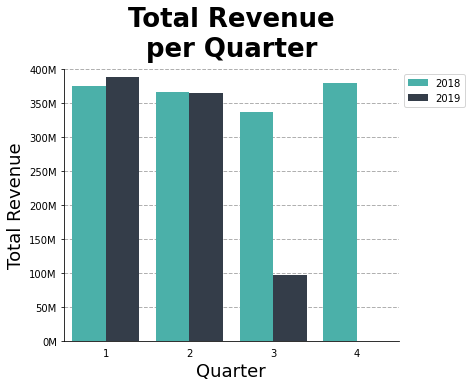

In [43]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby([sales_df['month_code'].dt.year, sales_df['month_code'].dt.quarter]).sum()[['invoiced_sales']]
temp_df = temp_df / 1000000 # Dividing by a million so we can rescale the figure.
temp_df.index.names = ['year', 'quarter']
temp_df.reset_index(inplace=True)

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x='quarter',
            y='invoiced_sales',
            data=temp_df,
            hue='year',
            hue_order=[2018, 2019],
            palette=['#3AC1B7', '#303D4C'],
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Total Revenue\nper Quarter', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Quarter', fontsize=18)
ax.set_ylabel('Total Revenue', fontsize=18)
ax.set_ylim(0, 400)
ax.set_yticks(range(0, 400+1, 50))
ax.set_yticklabels([str(int(label)) + 'M' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.
ax.legend(bbox_to_anchor=(1, 1)) # Set legend position.

plt.show()
plt.close()

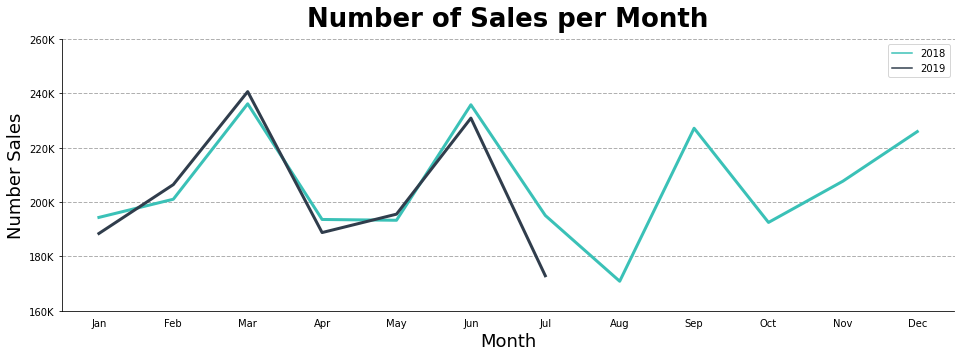

In [44]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby([sales_df['month_code'].dt.year, sales_df['month_code'].dt.month]).count()[['invoiced_sales']]
temp_df = temp_df / 1000 # Dividing by a thousand so we can rescale the figure.
temp_df.index.names = ['year', 'month']
temp_df.reset_index(inplace=True)

# Initialize figure.
fig, ax = plt.subplots(figsize=(16, 5))

# Create the lineplot.
sns.lineplot(x='month',
             y='invoiced_sales',
             data=temp_df,
             hue='year',
             hue_order=[2018, 2019],
             palette=['#3AC1B7', '#303D4C'],
             linewidth=3,
             zorder=3
            )

# Figure formatting.
sns.despine()
ax.set_title('Number of Sales per Month', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Month', fontsize=18)
ax.set_xlim(0.5, 12.5)
ax.set_xticks(np.arange(1, 12+1, 1))
ax.set_xticklabels([calendar.month_abbr[label] for label in ax.get_xticks()]) # Replace number by the corresponding month names.
ax.set_ylabel('Number Sales', fontsize=18)
ax.set_ylim(160, 260)
ax.set_yticks(range(160, 260+1, 20))
ax.set_yticklabels([str(int(label)) + 'K' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.
ax.legend(loc=1) # Set legend position.

plt.show()
plt.close()

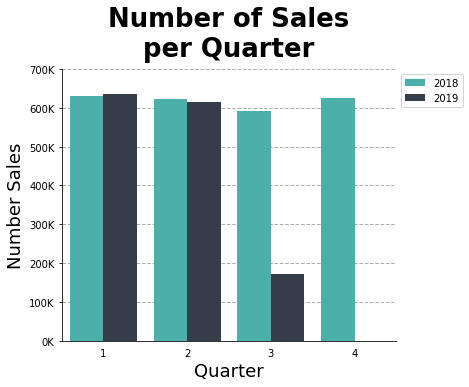

In [45]:
# Aggregate relevant data.
temp_df = sales_df.copy()
temp_df = sales_df.groupby([sales_df['month_code'].dt.year, sales_df['month_code'].dt.quarter]).count()[['invoiced_sales']]
temp_df = temp_df / 1000 # Dividing by a thousand so we can rescale the figure.
temp_df.index.names = ['year', 'quarter']
temp_df.reset_index(inplace=True)

# Initialize figure.
fig, ax = plt.subplots(figsize=(6, 5))

# Create the barplot.
sns.barplot(x='quarter',
            y='invoiced_sales',
            data=temp_df,
            hue='year',
            hue_order=[2018, 2019],
            palette=['#3AC1B7', '#303D4C'],
            linewidth=3,
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Number of Sales\nper Quarter', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Quarter', fontsize=18)
ax.set_ylabel('Number Sales', fontsize=18)
ax.set_ylim(0, 700)
ax.set_yticks(range(0, 700+1, 100))
ax.set_yticklabels([str(int(label)) + 'K' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.
ax.legend(bbox_to_anchor=(1, 1)) # Set legend position.

plt.show()
plt.close()

- **Takeaway**
<br>

We can clearly see some regularity both the number of sales and total revenue generated throughout the year: both increase at the end of quarter (March, June, September, and December), then peak back down at the start of the next quarter. Overall, when comparing quarter performance (only the year of 2018, since 2019 is incomplete), there does not seem to be a clear pattern, with only the third quarter showing a slight dip in sales and revenue. This end-of-quarter effect is quite probably an effect of seasonality-driven customer behavior.

<a class="anchor" id="recommendation-algorithms"></a>
# Recommendation Algorithms

There are many ways to build a recommender system. A few of them include:

<br>

- **Popularity:** The simplest implementation, where products are recommended simply based on what's popular. An example of this kind of recommender would be "Here are the products that been purchased the most lately". This approach is implemented below.
<br>

- **Content-Based:** This approach leverages any existing metadata associated to products (product type, country of origin, manufacturer, effects, purpose, etc.) to build a product profile and then search for and recommend other products that customers have not yet bought that share a similar profile. As mentioned, this system requires extensive metadata to be known for each product, which is not the case. Therefore, this approach will not be explored here. An example of this kind of recommender would be "Here are some other products that have characteristics similar to those you already have bought".
<br>

- **Collaborative Filtering:** This method is completely agnostic towards any metadata related to either customers or products. Instead, it relies exclusively on customer-product interactions (click rates, purchase history, product ratings, etc.). As such, and given our dataset, this approach seems like the best fit to our needs. There are two kinds of collaborative filtering, as described below:
<br>

    - **Item-Based:** This type of filtering takes the highest-rated products of a customer, looks for products that have similar ratings given to them by other customers, and recommend those as yet unseen products. Because we are dealing with purchase history, this is not the most effective version of collaborative filtering. An example of this kind of recommender would be "Here are some other products that are rated like this one that you rated highly".
<br>

    - **User-Based:** This approach looks for similar customers (similarity being based on rating or purchase patterns), then recommends products to a customer based on what other, most similar customers have already bought. Given the type of data we are working with, this seems like the best method to employ in order to build a system that is able to generate a more personalized set of recommendations. An example of this kind of recommender would be "Other users like you also bought these products". A simplified schematic of how this type of systems operate follows below:
    <img src="img/user_based_collaborative_filtering.png" width="300"/>
    
<br>

- **Hybrid:** These systems are more complex, and integrate both content-based and collaborative filtering approaches to generate a set of recommendations weighed by those two methods. Since they are more complex, they will not be implemented here.

In [46]:
# Start summarizing sales data.
# Get number of sales for each product for each customer in each country.
sales_freq = sales_df.copy().groupby(['country_code','customer_id','product_code'])[['units_sold']].count()
sales_freq.rename(columns={'units_sold': 'purchase_count'}, inplace=True, errors='ignore')

# Get amount of sold units for each product for each customer in each country.
sales_amount = sales_df.copy().groupby(['country_code','customer_id','product_code'])[['units_sold']].sum()
sales_amount.rename(columns={'units_sold': 'purchase_amount'}, inplace=True, errors='ignore')

# Concatenate both data together.
sales_info = pd.concat([sales_freq, sales_amount[['purchase_amount']]], axis=1)
sales_info.reset_index(inplace=True)

# Set a flag to mark which products were purchsed by each customer in each customer.
sales_info['purchase_flag'] = 1

sales_info

,country_code,customer_id,product_code,purchase_count,purchase_amount,purchase_flag
0,0,0,210,1,72,1
1,0,0,211,2,168,1
2,0,0,348,1,6,1
3,0,0,412,4,69,1
4,0,0,516,1,12,1
...,...,...,...,...,...,...
1108533,3,9999,4477,1,1,1
1108534,3,10001,9053,1,2,1
1108535,3,10001,10157,1,6,1
1108536,3,10007,2140,1,2,1


<a class="anchor" id="popularity-recommender"></a>
## Popularity Recommender

In [47]:
# Get, for each country, those products that are most frequently sold.
sales = sales_info.groupby(['country_code', 'product_code'])[['purchase_count']].sum().copy()
sales.sort_values(by=['country_code', 'purchase_count'], ascending=[True, False], inplace=True)
sales

purchase_count
country_code product_code                
0            261                     3061
             123                     2973
             211                     2833
             839                     2580
             524                     2455
...                                   ...
3            24652                      1
             24679                      1
             24686                      1
             24687                      1
             24690                      1

[54769 rows x 1 columns]

<a class="anchor" id="testing-popularity-recommender"></a>
### Testing Popularity Recommender

In [48]:
# Generating popularity-based recommendations.
top_sales = pd.DataFrame()
idx = pd.IndexSlice
country_codes = sales.index.levels[0].values
for code in country_codes:
    country_sales = sales.loc[idx[code, :], 'purchase_count'].reset_index()
    country_top = country_sales.head(10)
    top_sales = pd.concat([top_sales, country_top], axis=0)
    
top_sales

,country_code,product_code,purchase_count
0,0,261,3061
1,0,123,2973
2,0,211,2833
3,0,839,2580
4,0,524,2455
5,0,840,2334
6,0,769,2286
7,0,122,2244
8,0,242,2107
9,0,1173,2094


<a class="anchor" id="user-based-collaborative-filtering"></a>
## User-Based Collaborative Filtering

<a class="anchor" id="user-product-frequency-matrix"></a>
### User-Product Frequency Matrix

In [49]:
# Create a user-product matrix with the frequency of purchases of each customer for each product.
user_product_df = pd.pivot_table(sales_info.copy(),
                                 values='purchase_count',
                                 index='customer_id',
                                 columns=['product_code']
                                )
user_product_df

product_code,1,3,4,5,7,8,9,10,12,13,...,24683,24684,24685,24686,24687,24688,24689,24690,24691,24692
customer_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,18.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,3.0,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Testing normalization of the user-product matrix.
user_product_norm_df = user_product_df.copy()
for row in user_product_norm_df.iterrows():
    customer = row[0] # Get row index.
    customer_purchase = row[1] # Get row values.
    customer_min = customer_purchase.min()
    customer_max = customer_purchase.max()
    
    # Normalizing the user-product matrix customer-wise.
    user_product_norm_df.loc[customer] = (user_product_norm_df.loc[customer] - customer_min) / (customer_max - customer_min)

user_product_norm_df

product_code,1,3,4,5,7,8,9,10,12,13,...,24683,24684,24685,24686,24687,24688,24689,24690,24691,24692
customer_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.055556,NaN,NaN,0.944444,0.055556,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,0.111111,0.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a class="anchor" id="user-user-similarity-matrix"></a>
### User-User Similarity Matrix

In [51]:
# Initialize the user-user matrix as a zero-filled matrix.
n_customers = user_product_df.shape[0]
user_user_matrix = np.zeros(shape=(n_customers, n_customers))

# Set the minimum fraction of products two customers need to have in common
# in order to calculate the similarity between them.
minimum_overlap = 0.2

for i in range(n_customers):
    for j in range(n_customers):
        
        # Get customer purchases.
        customer_i = user_product_df.loc[i, :]
        customer_j = user_product_df.iloc[j, :]
        
        # Get all products bought by each customer.
        products_i = customer_i.dropna().index.values
        products_j = customer_j.dropna().index.values
        
        # Get products bought by both cutomers.
        common_products = np.intersect1d(products_i, products_j)
        
        # If the number of common products between both customers is less than the minimum
        # overlap threshold, skip to the next customer pair.
        if len(common_products) <= len(products_i) * minimum_overlap:
            user_user_matrix[i, j] = np.nan
            continue
        
        # Get purchases for the products bought by both customers.
        common_purchases_i = customer_i[common_products]
        common_purchases_j = customer_j[common_products]
        
        # Create an array with the purchases of both customers.
        products_pair = np.array([common_purchases_i.values, common_purchases_j.values])

        # Calculate similarity mtrix between the current pair of customers using the cosine distance.
        similarity_matrix = pairwise_distances(products_pair, metric='cosine')
        
        # Convert the cosine distance to cosine similarity.
        similarity_matrix = 1 - similarity_matrix
        
        # Extract the similarity score from the matrix.
        similarity_score = similarity_matrix[0, 1]
        
        # Penalty to apply to the similarity score based on how many common products there are between both customers.
        # This means that the more products two customers have in common, the higher will the similarity score be.
        penalty = len(common_products) / len(products_i)
        
        # Save the calculated similarity factor back into the user-user matrix for the current customer pair.
        user_user_matrix[i, j] = similarity_score * penalty

    # For now, we will populate only the first row of the matrix.
    break

user_user_matrix

array([[ 1., nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [52]:
# Convert the user-user matrix to a pandas DataFrame.
user_user_df = pd.DataFrame(user_user_matrix)

# Create an array with unique, ordered customer IDs.
customers_ids = user_product_df.index.values
customers_ids

# Set index and columns to be customer IDs.
user_user_df.columns = customers_ids
user_user_df.index = customers_ids

user_user_df

,0,3,4,5,6,7,8,9,10,11,...,10000,10001,10002,10003,10004,10007,10019,10022,10025,10028
0,1.0,NaN,NaN,0.186204,NaN,NaN,NaN,0.320382,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10007,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10019,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10022,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10025,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a class="anchor" id="testing-user-based-recommender"></a>
### Testing User-Based Recommender

In [53]:
# Select a target customer for which we want to get product recommendations.
target = 6670

# Get the target customer's similarity to each other customer.
target_similarities = user_user_df.copy().loc[target].dropna()

# Sort the similarities in descending order and remove target customer's similarity to itself.
sorted_similarities = target_similarities.sort_values(ascending=False).drop(index=target)

sorted_similarities

10028    0.0
3343     0.0
3331     0.0
3332     0.0
3333     0.0
        ... 
6667     0.0
6668     0.0
6669     0.0
6671     0.0
0        0.0
Name: 6670, Length: 7120, dtype: float64

In [54]:
# Get target customer's country code.
target_country = sales_df[sales_df['customer_id']==target]['country_code'].unique()[0]

# Get the country code for all customers.
customer_countries = sales_df.groupby('customer_id').mean()['country_code']

# Get the country code only for the customers who have a similarity score associated with the current target customer.
similarity_countries = customer_countries[sorted_similarities.index].astype(int)

similarity_countries

10028    3
3343     0
3331     3
3332     3
3333     2
        ..
6667     3
6668     3
6669     2
6671     3
0        0
Name: country_code, Length: 7120, dtype: int32

<a class="anchor" id="worldwide-implementation"></a>
### Worldwide Implementation
This implementation uses the entire dataset, disregarding any country-specific patterns that may exist.

In [55]:
# Concatenate together the similarity score and country code information for all countries (wordlwide).
ww_customer_similarity = pd.concat([sorted_similarities, similarity_countries], axis=1)

# Reset index to get the customer IDs in a column.
ww_customer_similarity.reset_index(inplace=True)

# Rename columns and make the rankings start at 1.
ww_customer_similarity.columns = ['customer_id', 'similarity_score', 'country_code']

ww_customer_similarity

,customer_id,similarity_score,country_code
0,10028,0.0,3
1,3343,0.0,0
2,3331,0.0,3
3,3332,0.0,3
4,3333,0.0,2
...,...,...,...
7115,6667,0.0,3
7116,6668,0.0,3
7117,6669,0.0,2
7118,6671,0.0,3


In [56]:
# Get purchase frequency from all customers.
ww_customers = user_product_df.loc[ww_customer_similarity['customer_id'].values]

# Keep data only for products that were actually purchased by customers.
ww_customer_products = ww_customers.dropna(how='all', axis=1)

# Remove all products that the target customer has already bought.
target_products = user_product_df.loc[target].dropna().index.values
ww_customer_products.drop(columns=target_products, inplace=True, errors='ignore')

ww_customer_products

product_code,1,3,4,5,7,8,9,10,13,15,...,24682,24683,24684,24685,24687,24688,24689,24690,24691,24692
customer_id,,,,,,,,,,,,,,,,,,,,,
10028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Get count of how many times each product was purchased across all customers.
product_freq_counts = pd.DataFrame(ww_customer_products.count())
product_freq_counts['customer_percent'] = round(ww_customer_products.count() / len(ww_customer_products.count()) * 100, 1)
product_freq_counts.columns = ['customer_count', 'customer_percent']

# Sort descending based on purchase frequency counts.
sorted_freq_counts = product_freq_counts.sort_values(by='customer_count', ascending=False)

sorted_freq_counts

,customer_count,customer_percent
product_code,,
498,799,4.4
1036,689,3.8
2972,682,3.7
412,660,3.6
477,607,3.3
...,...,...
19064,1,0.0
19065,1,0.0
6431,1,0.0


In [58]:
# Get a list of the sorted top products.
top_products = sorted_freq_counts.index.values

# Get data regarding only the purchases inlving the sorted top products.
top_products_data = sales_df.copy()[sales_df['product_code'].isin(top_products)]

# Calculate profit by volume of sales (i.e., sales - cost).
top_products_data['profit_volume'] = top_products_data['invoiced_sales'] - top_products_data['inventory_cost']

# Calculate profit per unit (i.e., (sales - cost) / # units sold).
top_products_data['profit_units'] = top_products_data['profit_volume'] / top_products_data['units_sold']

top_products_data

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost,bravo_ww_fran_name,bravo_fran_name,bravo_sub_fran_name,bravo_major_name,bravo_minor_name,profit_volume,profit_units
0,0,3,20,2018-04-01,95.10,4,24.41,0,0,0,0,0,70.69,17.672500
1,0,3,20,2018-06-01,23.77,1,6.10,0,0,0,0,0,17.67,17.670000
2,0,8,20,2019-04-01,63.50,2,12.15,0,0,0,0,0,51.35,25.675000
3,0,5,20,2018-04-01,16.51,1,6.10,0,0,0,0,0,10.41,10.410000
4,2,285,20,2018-02-01,52.64,5,30.51,0,0,0,0,0,22.13,4.426000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897163,2,9469,24355,2018-12-01,180.50,4,43.06,3,13,14,16,3,137.44,34.360000
3897164,2,9617,23181,2018-03-01,641.13,3,112.99,3,5,5,5,3,528.14,176.046667
3897165,2,9666,22727,2018-03-01,148.73,36,48.85,3,13,15,17,82,99.88,2.774444
3897166,3,9323,23913,2018-05-01,725.00,1,502.78,3,11,11,31,58,222.22,222.220000


In [59]:
# Group data by product, and calculate mean profit by volume for each.
profit_volume = top_products_data.groupby('product_code')['profit_volume'].sum().sort_values(ascending=False)

# Group data by product, and calculate mean profit per unit for each.
profit_units = top_products_data.groupby('product_code')['profit_units'].mean().sort_values(ascending=False)

# Get the purchase frequency for each product.
sold_freq = sales_info[sales_info['product_code'].isin(top_products)].groupby('product_code')['purchase_amount'].count()
sold_freq.sort_values(ascending=False, inplace=True)

# Get the purchase amount for each product.
sold_units = sales_info[sales_info['product_code'].isin(top_products)].groupby('product_code')['purchase_amount'].sum()
sold_units.sort_values(ascending=False, inplace=True)

sold_units

product_code
211      935207
678      793952
839      676208
9629     631500
1419     531575
          ...  
19918         1
4181          1
13836         1
13843         1
16476         1
Name: purchase_amount, Length: 18366, dtype: int64

In [60]:
# Concatenate sorted frequency counts and both profit measures together.
top_metrics = pd.concat([sorted_freq_counts, sold_freq, sold_units, profit_volume, profit_units], axis=1)

# Rename and format columns.
top_metrics.columns = ['customer_count',
                       'customer_percent',
                       'product_frequency',
                       'product_amount',
                       'total_profit',
                       'avg_profit_unit'
                      ]
top_metrics['total_profit'] = top_metrics['total_profit'].apply(lambda x: round(x, 2))
top_metrics['avg_profit_unit'] = round(top_metrics['avg_profit_unit'], 2)

# Sort table.
top_metrics.sort_values(by='total_profit', ascending=False, inplace=True)

# Get only the top N products.
n_products = 10
top_metrics = top_metrics[:n_products]

top_metrics

,customer_count,customer_percent,product_frequency,product_amount,total_profit,avg_profit_unit
product_code,,,,,,
2972,682,3.7,682,109995,13946509.20,126.90
8795,125,0.7,125,9247,9908825.08,1246.00
7862,142,0.8,142,8831,9652314.86,1172.31
498,799,4.4,799,46629,7935121.43,176.32
1431,342,1.9,342,72816,7813080.19,124.65
412,660,3.6,660,83322,6824680.08,83.19
729,348,1.9,348,20766,6753326.96,328.91
4061,403,2.2,403,47486,5795926.27,127.07
3608,557,3.0,557,43375,5450561.83,126.29


<a class="anchor" id="regional-implementation"></a>
### Regional Implementation
This implementation segments the dataset according to the target customer's country. This way, we attempt to get recommendations that might be more aligned with any regional purchase patterns.

In [61]:
# Select how many similar customers to return.
top_n_customers = 20

# Get top N similar customers to target customer.
regional_customer_similarity = ww_customer_similarity[ww_customer_similarity['country_code']==target_country]
regional_customer_similarity = regional_customer_similarity[:top_n_customers]

# Reset the index to get a continuous index.
regional_customer_similarity.reset_index(inplace=True, drop=True)

# Rename columns.
regional_customer_similarity.columns = ['customer_id', 'similarity_score', 'country_code']

regional_customer_similarity

,customer_id,similarity_score,country_code
0,3333,0.0,2
1,3334,0.0,2
2,3338,0.0,2
3,3339,0.0,2
4,3340,0.0,2
5,3341,0.0,2
6,3328,0.0,2
7,3349,0.0,2
8,3350,0.0,2
9,3353,0.0,2


In [62]:
# Get purchase frequency from top N most similiar customers to target customer.
regional_customers = user_product_df.loc[regional_customer_similarity['customer_id'].values]

# Keep data only for products that were actually purchased by customers.
regional_customer_products = regional_customers.dropna(how='all', axis=1)

# Remove all products that the target customer has already bought.
target_products = user_product_df.loc[target].dropna().index.values
regional_customer_products.drop(columns=target_products, inplace=True, errors='ignore')

regional_customer_products

product_code,9,23,32,33,54,61,64,65,75,87,...,24524,24530,24547,24556,24587,24588,24651,24677,24689,24691
customer_id,,,,,,,,,,,,,,,,,,,,,
3333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3341,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3349,10.0,NaN,NaN,NaN,19.0,4.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3350,NaN,4.0,2.0,NaN,NaN,NaN,NaN,17.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Get count of how many times each product was purchased across the top N customers.
product_freq_counts = pd.DataFrame(regional_customer_products.count())
product_freq_counts['customer_percent'] = round(regional_customer_products.count() / top_n_customers * 100, 1)
product_freq_counts.columns = ['customer_count', 'customer_percent']

# Sort descending based on purchase frequency counts.
sorted_freq_counts = product_freq_counts.sort_values(by='customer_count', ascending=False)

sorted_freq_counts

,customer_count,customer_percent
product_code,,
10847,5,25.0
4174,5,25.0
8834,5,25.0
9384,5,25.0
8501,4,20.0
...,...,...
7438,1,5.0
7433,1,5.0
7429,1,5.0


In [64]:
# Get a list of the sorted top products.
top_products = sorted_freq_counts.index.values

# Get data regarding only the purchases inlving the sorted top products.
top_products_data = sales_df.copy()[sales_df['product_code'].isin(top_products)]

# Calculate profit by volume of sales (i.e., sales - cost).
top_products_data['profit_volume'] = top_products_data['invoiced_sales'] - top_products_data['inventory_cost']

# Calculate profit per unit (i.e., (sales - cost) / # units sold).
top_products_data['profit_units'] = top_products_data['profit_volume'] / top_products_data['units_sold']

top_products_data

,country_code,customer_id,product_code,month_code,invoiced_sales,units_sold,inventory_cost,bravo_ww_fran_name,bravo_fran_name,bravo_sub_fran_name,bravo_major_name,bravo_minor_name,profit_volume,profit_units
84,0,3,23,2018-12-01,375.42,6,108.94,0,0,0,0,0,266.48,44.413333
85,0,4,23,2019-07-01,295.70,6,108.94,0,0,0,0,0,186.76,31.126667
86,0,3,23,2018-04-01,463.77,6,108.94,0,0,0,0,0,354.83,59.138333
87,0,7,23,2019-03-01,386.47,6,108.94,0,0,0,0,0,277.53,46.255000
88,0,42,23,2018-12-01,386.47,6,108.94,0,0,0,0,0,277.53,46.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895778,2,3349,20499,2018-01-01,7235.77,3,1527.77,3,3,3,3,3,5708.00,1902.666667
3895779,3,6624,20499,2018-12-01,3525.00,1,509.26,3,3,3,3,3,3015.74,3015.740000
3895780,3,6624,20499,2018-03-01,7050.00,2,1018.51,3,3,3,3,3,6031.49,3015.745000
3895781,3,8591,20499,2018-09-01,1551.00,1,509.26,3,3,3,3,3,1041.74,1041.740000


In [65]:
# Group data by product, and calculate mean profit by volume for each.
profit_volume = top_products_data.groupby('product_code')['profit_volume'].sum().sort_values(ascending=False)

# Group data by product, and calculate mean profit per unit for each.
profit_units = top_products_data.groupby('product_code')['profit_units'].mean().sort_values(ascending=False)

# Get the purchase frequency for each product.
sold_freq = sales_info[sales_info['product_code'].isin(top_products)].groupby('product_code')['purchase_amount'].count()
sold_freq.sort_values(ascending=False, inplace=True)

# Get the purchase amount for each product.
sold_units = sales_info[sales_info['product_code'].isin(top_products)].groupby('product_code')['purchase_amount'].sum()
sold_units.sort_values(ascending=False, inplace=True)

sold_units

product_code
9629     631500
8331     492641
9315     448202
8906     361901
1798     330956
          ...  
18225         2
21651         1
17222         1
21414         1
14838         1
Name: purchase_amount, Length: 2131, dtype: int64

In [66]:
# Concatenate sorted frequency counts and both profit measures together.
top_metrics = pd.concat([sorted_freq_counts, sold_freq, sold_units, profit_volume, profit_units], axis=1)

# Rename and format columns.
top_metrics.columns = ['customer_count',
                       'customer_percent',
                       'product_frequency',
                       'product_amount',
                       'total_profit',
                       'avg_profit_unit'
                      ]
top_metrics['total_profit'] = top_metrics['total_profit'].apply(lambda x: round(x, 2))
top_metrics['avg_profit_unit'] = round(top_metrics['avg_profit_unit'], 2)

# Sort table.
top_metrics.sort_values(by='total_profit', ascending=False, inplace=True)

# Get only the top N products.
n_products = 10
top_metrics = top_metrics[:n_products]

top_metrics

,customer_count,customer_percent,product_frequency,product_amount,total_profit,avg_profit_unit
product_code,,,,,,
8795,1,5.0,125,9247,9908825.08,1246.00
7862,1,5.0,142,8831,9652314.86,1172.31
498,2,10.0,799,46629,7935121.43,176.32
412,1,5.0,660,83322,6824680.08,83.19
729,1,5.0,348,20766,6753326.96,328.91
9596,2,10.0,117,4885,5201593.25,1171.13
12238,1,5.0,85,5508,4837593.59,998.57
1768,2,10.0,465,42796,4395533.33,102.94
9027,1,5.0,281,63891,4264410.83,68.67


- **Takeaway**
<br>

We see that the popularity recommender generates a set of products that differs wildly from those given by any of user-based implementations.
Moreover, we can see that, despite the fact that both worldwide and regional implementations have products in common in their top picks, they are in a different order, and also include different products. This may reflect a better tuning of the regional approach to the local needs and/or preferences of the target customer.

<a class="anchor" id="function-encapsulation"></a>
## Function Encapsulation

Now that we have tested the different pieces and steps of the recommendation engine, we can encapsulate it into several functions. This will make the recommender system more practical to use, as well as more flexible (it can be parameterized), more portable (it can be exported, for instance, to  a .py file to run outside of the jupyter environment or on another machine), and safer (due to python function scoping, the recommender becomes shielded from external variables that might confound it).

In [67]:
def summarize_sales(sales_table, target_customer, level, measure, regional, time_window):
    '''
    This function summarizes sales data for further processing.
    Takes the following arguments:
    
    sales_table:         (pandas.DataFrame); dataframe containing all the sales data.
    target_customer:     (int); customer ID for which we want to recommend products.
    level:               (str); which level of product to recommend. Can be any of the fields in the product_master table.
    measure:             (str); How to summarize sales data. Can be "count", "amount", or "flag".
    regional:            (bool); whether to filter recommendations to the target customer's country.
    time_window:         (dict); whether to filter recommendations to a given time period. Each key of the dictionary
                                 represents a specific time unit, and as such must be given as integers.

    Returns a summarized version of the original sales data. This includes potential filtering for region and/or time,
    as well as one of different possible aggregations.
    '''
    
    temp_df = sales_table.copy()
    
    # Regional filter.
    if regional:
        target_country = temp_df[temp_df['customer_id']==target_customer]['country_code'].unique()[0]
        temp_df = temp_df[temp_df['country_code']==target_country]
    
    # Temporal filter.
    if time_window['years'] is not None:
        years = sorted(temp_df['month_code'].dt.year.unique(), reverse=True)
        windowed_years = years[:time_window['years']+1]
        temp_df = temp_df[temp_df['month_code'].dt.year.isin(windowed_years)]
    if time_window['quarter'] is not None:
        temp_df = temp_df[temp_df['month_code'].dt.quarter==time_window['quarter']]
    
    # Aggregation method.
    if measure == 'count':
        sales_summary = temp_df.groupby(['country_code', 'customer_id', level])[['units_sold']].count()
    elif measure == 'amount':
        sales_summary = temp_df.groupby(['country_code', 'customer_id', level])[['units_sold']].sum()
    elif measure == 'flag':
        sales_summary = temp_df.groupby(['country_code', 'customer_id', level])[['units_sold']].mean()
        sales_summary['units_sold'] = 1

    sales_summary.rename(columns={'units_sold': 'purchase_' + measure}, inplace=True)
    sales_summary.reset_index(inplace=True)
    
    return sales_summary

In [68]:
def build_user_product_matrix(sales_table, target_customer, level, measure, regional, time_window, normalize):
    '''
    This function builds the user-product matrix and saves it to a pandas DataFrame. Each column is a product and each
    row index is a customer. Values can be the frequency of purchase, amount of purchase, or purchase/no-purchase flag.
    Takes the following arguments:
    
    sales_table:         (pandas.DataFrame); dataframe containing all the sales data.
    target_customer:     (int); customer ID for which we want to recommend products.
    level:               (str); which level of product to recommend. Can be any of the fields in the product_master table.
    measure:             (str); How to summarize sales data. Can be "count", "amount", or "flag".
    regional:            (bool); whether to filter recommendations to the target customer's country.
    time_window:         (dict); whether to filter recommendations to a given time period. Each key of the dictionary
                                 represents a specific time unit, and as such must be given as integers.
    normalize:           (bool); whether to normalize the user-product matrix.

    Returns a pandas DataFrame with summarized purchased data for each customer-product pair.
    '''
    
    # Summarize data.
    sales_summary = summarize_sales(sales_table, target_customer, level, measure, regional, time_window)

    # Get user-product matrix.
    user_product_df = pd.pivot_table(sales_summary,
                                     values='purchase_' + measure,
                                     index='customer_id',
                                     columns=[level]
                                    )

    # Normalization step.
    if normalize and measure != 'flag':
        for row in user_product_df.iterrows():
            customer = row[0]
            customer_purchase = row[1]
            customer_min = customer_purchase.min()
            customer_max = customer_purchase.max()
            user_product_df.loc[customer] = (user_product_df.loc[customer] - customer_min) / (customer_max - customer_min)
    
    return user_product_df

In [69]:
def calculate_similarity_vector(products_matrix, target_customer, distance_metric, fraction_overlap):
    '''
    This function calculates a vector of customer similarities.
    Takes the following arguments:
    
    products_matrix:     (pandas.DataFrame); user-product dataframe.
    target_customer:     (int); customer ID for which we want to recommend products.
    distance_metric:     (str); which metric to use to calculate distance/similarity between customers.
                                So far only "cosine" is implemented.
    fraction_overlap:    (float); fraction of purchased products the target customer must have in common with each
                                  other customer for their similarity score to be calculated. Otherwise, defaults to NaN.
    
    Returns a numpy array composed of similarities between a given target customer and all other customers.
    '''
    
    temp_matrix = products_matrix.copy()

    # Initialize vector.
    n_customers = len(temp_matrix)
    similarity_vector = np.zeros(shape=n_customers)
    for i in range(n_customers):

        # Get customer data.
        customer_target = temp_matrix.loc[target_customer, :]
        customer_i = temp_matrix.iloc[i, :]

        products_target = customer_target.dropna().index.values
        products_i = customer_i.dropna().index.values

        common_products = np.intersect1d(products_target, products_i)
        if len(common_products) < (len(products_target) * fraction_overlap):
            similarity_vector[i] = np.nan
            continue
        
        common_purchases_target = customer_target[common_products]
        common_purchases_i = customer_i[common_products]
        products_pair = np.array([common_purchases_target.values, common_purchases_i.values])

        # Calculate similarity.
        similarity_matrix = pairwise_distances(products_pair, metric=distance_metric)
        similarity_matrix = 1 - similarity_matrix
        similarity_score = similarity_matrix[0, 1]
        penalty = len(common_products) / len(products_target)
        similarity_vector[i] = similarity_score * penalty
        
    # Save similarity vector to a pandas Series.
    similarity_series = pd.Series(similarity_vector)
    customers_ids = temp_matrix.index.values
    similarity_series.index = customers_ids
    similarity_series = similarity_series.dropna().sort_values(ascending=False).drop(index=target_customer)

    return similarity_series

In [70]:
def get_potential_products(products_matrix, customer_ids, target_customer):
    '''
    This function removes products not purchased by the most similar customers to our target customer.
    Takes the following arguments:
    
    products_matrix:     (pandas.DataFrame); user-product dataframe.
    customer_ids:        (array); numpy array containing the customer IDs of the N most similar customers to 
                                  a given target customer.
    target_customer:     (int); customer ID for which we want to recommend products.

    Returns the top a user-product dataframe with only the products purchased by the most similar customers.
    '''
    
    # Get similar customer.
    similar_customers = products_matrix.loc[customer_ids]
    
    # Get products bought by similar customers.
    potential_products = similar_customers.dropna(how='all', axis=1)
    
    # Remove products already bought by the target customer that are still present in the product DataFrame.
    target_products = products_matrix.loc[target_customer].dropna().index.values
    products_to_drop = np.intersect1d(target_products, potential_products.columns)
    potential_products.drop(columns=products_to_drop, inplace=True, errors='ignore')

    return potential_products

In [71]:
def get_product_count(potential_products, n_neighbors):
    '''
    This function counts how many times a given set of potential products has been purchased.
    Takes the following arguments:
    
    potential_products:  (pandas.DatFrame); dataframe containing only products bought by the N most similar customers.
    n_neighbors:         (int); how many similar customers to our target customer we want to find.

    Returns a pandas DataFrame the with the counts of of each potential product as a column, and the product code of
    each corresponding potential product as the index.
    '''
    
    # Get purchase frequency for each product and store it in a DataFrame.
    product_freq_counts = pd.DataFrame(potential_products.count())
    
    # Calculate how many customers out of the top N most similar customers have purchased each product.
    product_freq_counts['customer_percent'] = round(potential_products.count() / n_neighbors * 100, 3)
    
    # Format and sort table.
    product_freq_counts.columns = ['customer_count', 'customer_percent']
    sorted_freq_counts = product_freq_counts.sort_values(by='customer_count', ascending=False)

    return sorted_freq_counts

In [72]:
def calculate_avg_similarity(potential_products, customer_similarity, counts_df):
    '''
    This function calculates the average similarity from the customers that buy the same
    product from among the top N most similar customers.
    Takes the following arguments:
    
    potential_products    (pandas.DataFrame); user-product dataframe containing only the top N most similar customers.
    customer_similarity   (pandas.Series); series containing similarity of the top N most similar customers.
    counts_df             (pandas.DataFrame); dataframe containing product counts.
    
    Returns a pandas DataFrame with average similarity for each product in it.
    '''

    # Initialize an empty dictionary to store the average similarity for each product.
    product_dict = {}
    
    for product in potential_products.columns:
        
        # Get which customers buy the current product.
        product_buyers = potential_products[product].dropna().index.to_list()
        
        # Calculate the average similarity for only those customers that have bought the current product.
        avg_buyers_similarity = customer_similarity[product_buyers].mean()
        
        # Store the average similarity into the dictionary.
        product_dict[product] = avg_buyers_similarity

    # Add measures to the table.
    counts_df['avg_similarity'] = counts_df.index.to_series().map(product_dict)
    counts_df['purchase_probability'] = counts_df['avg_similarity'] * counts_df['customer_percent'] / 100
        
    return counts_df

In [73]:
def calculate_purchase_amount(sales_table, target_customer, level, regional, time_window, similarity_ids, counts_df):
    '''
    This function calculates the median purchase amount of each product. This median is taken only for those customers
    within the top N most similar customers that have bought each product.
    Takes the following arguments:
    
    sales_table:         (pandas.DataFrame); dataframe containing all the sales data.
    target_customer:     (int); customer ID for which we want to recommend products.
    level:               (str); which level of product to recommend. Can be any of the fields in the product_master table.
    regional:            (bool); whether to filter recommendations to the target customer's country.
    time_window:         (dict); whether to filter recommendations to a given time period. Each key of the dictionary
                                 represents a specific time unit, and as such must be given as integers.
    similarity_ids:      (numpy.array); array containing customer IDs of the top N most similar customers.
    counts_df            (pandas.DataFrame); dataframe containing product counts.

    Returns a pandas DataFrame with projected profit for each product in it.
    '''
    
    # Get un-normalized user-product amount matrix.
    products_matrix = build_user_product_matrix(sales_table=sales_table,
                                                target_customer=target_customer,
                                                level=level,
                                                measure='amount',
                                                regional=regional,
                                                time_window=time_window,
                                                normalize=False
                                               )
    
    # Get which products were bought by the top N most tsimilar customers.
    potential_products = get_potential_products(products_matrix, similarity_ids, target_customer)
    
    # Initialize an empty dictionary to store the average similarity for each product.
    product_amounts = {}
    
    # Calculate, for each potential product, the median amount of units purchsed.
    for product in potential_products.columns:
        product_amounts[product] = np.median(potential_products[product].dropna().values)

    # Add measures to the table.
    counts_df['median_purchase_amount'] = counts_df.index.to_series().map(product_amounts)

    return counts_df

In [74]:
def get_top_products(sales_table, counts_df, target_customer, n_products, level, sort_by, regional, time_window):
    '''
    This function summarizes sales data for potential products based on these products' counts.
    Takes the following arguments:
    
    sales_table:         (pandas.DataFrame); dataframe containing all the sales data.
    counts_df:           (pandas.DatFrame); dataframe containing product counts.
    target_customer:     (int); customer ID for which we want to recommend products.
    n_products:          (int); how many products to recommend.
    level:               (str); which level of product to recommend. Can be any of the fields in the product_master table.
    sort_by:             (str); which metric to sort recommendations by. Can be "customer_count", "customer_percent",
                                "product_frequency", "product_amount", "profit_volume", or "avg_profit_unit".
    regional:            (bool); whether to filter recommendations to the target customer's country.
    time_window:         (dict); whether to filter recommendations to a given time period. Each key of the dictionary
                                 represents a specific time unit, and as such must be given as integers.

    Returns the top a pandas DataFrame with calculated measures for potential products.
    '''
    
    # Get a list of the sorted top products.
    top_products = counts_df.index.values
    top_products_data = sales_table.copy()[sales_table[level].isin(top_products)]
    
    # Calculate total profit and profit per unit sold.
    top_products_data['total_profit'] = top_products_data['invoiced_sales'] - top_products_data['inventory_cost']
    top_products_data['avg_profit_unit'] = top_products_data['total_profit'] / top_products_data['units_sold']

    # Summarize data.
    sales_summary = summarize_sales(sales_table, target_customer, level, 'amount', regional, time_window)
    
    # Get total product purchase frequency, aggregated by product level.
    sold_freq = sales_summary[sales_summary[level].isin(top_products)].groupby(level)['purchase_amount'].count()
    sold_freq.sort_values(ascending=False, inplace=True)
    sold_freq.name = 'total_purchase_frequency'
    
    # Get total product purchase amount, aggregated by product level.
    sold_units = sales_summary[sales_summary[level].isin(top_products)].groupby(level)['purchase_amount'].sum()
    sold_units.sort_values(ascending=False, inplace=True)
    sold_units.name = 'total_purchase_amount'
    
    # Get total profit from product sales and average profit per unit sold, aggregated by product level.
    profit_volume = round(top_products_data.groupby(level)['total_profit'].sum().sort_values(ascending=False), 2)
    profit_units = round(top_products_data.groupby(level)['avg_profit_unit'].mean().sort_values(ascending=False), 2)

    # Concatenate all metrics together.
    top_metrics = pd.concat([counts_df, sold_freq, sold_units, profit_volume, profit_units], axis=1)
    
    # Calculate projected profit.
    avg_profit_unit = top_metrics['avg_profit_unit']
    median_purchase_amount = top_metrics['median_purchase_amount']
    purchase_probability = top_metrics['purchase_probability']
    top_metrics['projected_profit'] = round(avg_profit_unit * median_purchase_amount * purchase_probability, 2)

    # Sort table, and get only the top N products to recommend.
    top_metrics = top_metrics.sort_values(by=sort_by, ascending=False)
    top_metrics = top_metrics[:n_products]

    return top_metrics

In [75]:
def recommendation_engine(sales_table, target_customer, n_neighbors=20, n_products=10, model='popularity', level='product_code',
                          distance_metric='cosine', measure='count', sort_by='total_product_frequency', regional=True,
                          time_window={'years': None, 'quarter': None}, normalize=True, fraction_overlap=0.2):
    '''
    User-based collaborative filtering recommender.
    Takes the following arguments:
    
    sales_table:         (pandas.DataFrame); dataframe containing all the sales data.
    target_customer:     (int); customer ID for which we want to recommend products.
    n_neighbors:         (int); how many similar customers to our target customer we want to find.
    n_products:          (int); how many products to recommend.
    model:               (str); whether to use "popularity" or "user-based" approach.
    level:               (str); which level of product to recommend. Can be any of the fields in the product_master table.
    distance_metric:     (str); which metric to use to calculate distance/similarity between customers.
                                So far only "cosine" is implemented.
    measure:             (str); How to summarize sales data. Can be "count", "amount", or "flag".
    sort_by:             (str); which metric to sort recommendations by. Can be "customer_count", "customer_percent",
                                "product_frequency", "product_amount", "profit_volume", or "avg_profit_unit".
    regional:            (bool); whether to filter recommendations to the target customer's country.
    time_window:         (dict); whether to filter recommendations to a given time period. Each key of the dictionary
                                 represents a specific time unit, and as such must be given as integers.
    normalize:           (bool); whether to normalize the user-product matrix.
    fraction_overlap:    (float); fraction of purchased products the target customer must have in common with each
                                  other customer for their similarity score to be calculated. Otherwise, defaults to NaN.

    Returns the top N products to recommend to the target customer.
    '''

    # Get user-product matrix.
    products_matrix = build_user_product_matrix(sales_table, target_customer, level, measure, regional, time_window, normalize)

    # Get similarity scores between the current target customer and all other customers.
    similarity_vector = calculate_similarity_vector(products_matrix, target_customer, distance_metric, fraction_overlap)

    if model == 'user_based':

        # Select only the top N most similar customers.
        similarity_vector = similarity_vector[:n_neighbors]

    # Get which products were bought by the top N most tsimilar customers.
    potential_products = get_potential_products(products_matrix, similarity_vector.index.values, target_customer)

    # Get product purchase frequency.
    product_count = get_product_count(potential_products, len(potential_products.index.values))

    # Add average similarity for each product to the purchase frequency table.
    counts_avg_similarity = calculate_avg_similarity(potential_products, similarity_vector, product_count)

    # Add projected profits for each product to the purchase frequency table.
    enriched_counts = calculate_purchase_amount(sales_table,
                                                target_customer,
                                                level, regional,
                                                time_window,
                                                similarity_vector.index.values,
                                                counts_avg_similarity
                                               )

    # Get the top N products to recommend.
    top_products = get_top_products(sales_table, enriched_counts, target_customer, n_products, level, sort_by, regional, time_window)

    return top_products

In [76]:
def get_recommendations(sales_table, target_customer, n_neighbors=20, n_products=10, model='user_based', level='product_code',
                        distance_metric='cosine', measure='count', regional=True, time_window={'years': None, 'quarter': None},
                        normalize=True, fraction_overlap=0.2, cold_start_thresh=5):
    '''
    Get product recommendations for a target customer based on purchase history.
    Takes the following arguments:
    
    sales_table:         (pandas.DataFrame); dataframe containing all the sales data.
    target_customer:     (int); customer ID for which we want to recommend products.
    n_neighbors:         (int); how many similar customers to our target customer we want to find.
    n_products:          (int); how many products to recommend.
    model:               (str); whether to use "popularity" or "user-based" approach.
    level:               (str); which level of product to recommend. Can be any of the fields in the product_master table.
    distance_metric:     (str); which metric to use to calculate distance/similarity between customers.
                                So far only "cosine" is implemented.
    measure:             (str); How to summarize sales data. Can be "count", "amount", or "flag".
    sort_by:             (str); which metric to sort recommendations by. Can be "customer_count", "customer_percent",
                                "product_frequency", "product_amount", "profit_volume", or "avg_profit_unit".
    regional:            (bool); whether to filter recommendations to the target customer's country.
    time_window:         (dict); whether to filter recommendations to a given time period. Each key of the dictionary
                                 represents a specific time unit, and as such must be given as integers.
    normalize:           (bool); whether to normalize the user-product matrix.
    fraction_overlap:    (float); fraction of purchased products the target customer must have in common with each
                                  other customer for their similarity score to be calculated. Otherwise, defaults to NaN.
    cold_start_thresh:   (int); minimum amount of purchases a target customer must have to qualify for the user-based
                                approach. If this amount is not met, the algorithm defaults to the popularity approach.
    
    Returns the top N products to recommend to the target customer.
    '''
    
    temp_df = sales_table.copy()

    # Get how many products the current target customer has purchased.
    n_customer_purchases = temp_df.groupby('customer_id')[['product_code']].count().loc[target_customer].values[0]
    
    # If "n_customer_purchases" is below the set cold start threshold, use the popularity recommender.
    # Otherwise, use whichever algorithm was specified during the function call.
    if n_customer_purchases <= cold_start_thresh:
        recommendations = recommendation_engine(sales_table=sales_table,
                                                target_customer=target_customer,
                                                n_products=n_products,
                                                model='popularity',
                                                level=level,
                                                distance_metric=distance_metric,
                                                measure=measure,
                                                sort_by='total_purchase_frequency',
                                                regional=regional,
                                                time_window=time_window,
                                                normalize=normalize,
                                                fraction_overlap=fraction_overlap
                                               )
    else:
        recommendations = recommendation_engine(sales_table=sales_table,
                                                target_customer=target_customer,
                                                n_neighbors=n_neighbors,
                                                n_products=n_products,
                                                model=model,
                                                level=level,
                                                distance_metric=distance_metric,
                                                measure=measure,
                                                sort_by='total_purchase_frequency' if model == 'popularity' else 'purchase_probability',
                                                regional=regional,
                                                time_window=time_window,
                                                normalize=normalize,
                                                fraction_overlap=fraction_overlap
                                               )
    
    return recommendations

In [77]:
# Make a test call to the encapsulated recomender with popularity-based sorting.
popularity_example = get_recommendations(sales_table=sales_df,
                                         target_customer=6670,
                                         n_neighbors=20,
                                         n_products=10,
                                         model='popularity',
                                         level='product_code',
                                         distance_metric='cosine',
                                         measure='amount',
                                         regional=False,
                                         time_window={'years': None, 'quarter': None},
                                         normalize=True,
                                         fraction_overlap=0.2,
                                         cold_start_thresh=5,
                                        )

popularity_example

,customer_count,customer_percent,avg_similarity,purchase_probability,median_purchase_amount,total_purchase_frequency,total_purchase_amount,total_profit,avg_profit_unit,projected_profit
product_code,,,,,,,,,,
498,23,54.762,0.121723,0.066658,42.0,799,46629,7935121.43,176.32,493.63
1036,26,61.905,0.118196,0.073169,15.0,689,13426,3561438.39,267.63,293.73
2972,19,45.238,0.119592,0.054101,144.0,682,109995,13946509.20,126.90,988.62
412,8,19.048,0.134373,0.025595,57.0,660,83322,6824680.08,83.19,121.37
477,11,26.190,0.117829,0.030860,7.0,607,10470,1670868.83,184.22,39.79
844,7,16.667,0.111562,0.018594,28.0,601,11126,1722262.10,178.61,92.99
699,9,21.429,0.111298,0.023850,4.0,595,10611,1938470.27,194.50,18.56
284,11,26.190,0.117829,0.030860,10.0,582,10463,1585336.02,175.08,54.03
1643,11,26.190,0.125079,0.032758,18.0,572,39852,1342839.97,36.30,21.40


In [78]:
# Make a test call to the encapsulated recomender with user-based collaborative filtering.
user_based_example = get_recommendations(sales_table=sales_df,
                                         target_customer=6670,
                                         n_neighbors=20,
                                         n_products=10,
                                         model='user_based',
                                         level='product_code',
                                         distance_metric='cosine',
                                         measure='amount',
                                         regional=False,
                                         time_window={'years': None, 'quarter': None},
                                         normalize=True,
                                         fraction_overlap=0.2,
                                         cold_start_thresh=5,
                                        )

user_based_example

,customer_count,customer_percent,avg_similarity,purchase_probability,median_purchase_amount,total_purchase_frequency,total_purchase_amount,total_profit,avg_profit_unit,projected_profit
product_code,,,,,,,,,,
8501,17,85.0,0.140866,0.119736,1380.0,365,248860,2967729.31,13.27,2192.68
1036,15,75.0,0.137995,0.103496,21.0,689,13426,3561438.39,267.63,581.67
11163,14,70.0,0.138555,0.096989,324.0,243,244855,177421.38,0.81,25.45
15685,13,65.0,0.141919,0.092248,6.0,192,1050,4481.91,4.44,2.46
4174,13,65.0,0.141406,0.091914,269.0,332,45658,2356466.76,56.84,1405.36
12712,13,65.0,0.141406,0.091914,10.0,187,1563,163621.95,104.47,96.02
13806,13,65.0,0.141218,0.091792,2.0,201,408,21222.62,56.13,10.30
10815,13,65.0,0.139077,0.090400,360.0,210,192724,297986.24,1.60,52.07
10854,13,65.0,0.138201,0.089831,168.0,275,31968,91680.08,2.92,44.07


In [79]:
# Set parameters we want to test and their possible values.
parameter_space = {'model': ['popularity', 'user_based'],
                   'measure': ['count', 'amount', 'flag'],
                   'regional': [False, True],
                   'normalize': [False, True]
                  }

# Create a list of parameter combinations to test.
parameter_combinations = list(itertools.product(*(parameter_space[parameter] for parameter in parameter_space)))

# Remove those combinations where measure is "flag" AND normalize is True (since it is the same as when normalize is False).
filtered_combinations = [combination for combination in parameter_combinations if (combination[1] != 'flag') | (combination[3] != True)]

filtered_combinations

[('popularity', 'count', False, False),
 ('popularity', 'count', False, True),
 ('popularity', 'count', True, False),
 ('popularity', 'count', True, True),
 ('popularity', 'amount', False, False),
 ('popularity', 'amount', False, True),
 ('popularity', 'amount', True, False),
 ('popularity', 'amount', True, True),
 ('popularity', 'flag', False, False),
 ('popularity', 'flag', True, False),
 ('user_based', 'count', False, False),
 ('user_based', 'count', False, True),
 ('user_based', 'count', True, False),
 ('user_based', 'count', True, True),
 ('user_based', 'amount', False, False),
 ('user_based', 'amount', False, True),
 ('user_based', 'amount', True, False),
 ('user_based', 'amount', True, True),
 ('user_based', 'flag', False, False),
 ('user_based', 'flag', True, False)]

In [80]:
# Initialize empty DataFrame to sotre data in.
methods_df = pd.DataFrame()

# For each combination of parameters we want to test, call the recommender with that set of parameters.
for n, combination in enumerate(filtered_combinations):
    
    print(n, combination)
    
    # Function call.
    recommendations = get_recommendations(sales_table=sales_df,
                                          target_customer=6670,
                                          model=combination[0],
                                          measure=combination[1],
                                          regional=combination[2],
                                          normalize=combination[3]
                                         )
    
    # Get total profit generated from top N product recommendations, and add this sum to the list of tested parameters.
    sum_profits = recommendations['projected_profit'].sum()
    combination_list = list(combination)
    combination_list.append(sum_profits)
    
    # Get DataFrame columns, and add a column for total projected profit, calculated above.
    column_list = list(parameter_space.keys())
    column_list.append('projected_profit')
    
    # Store the currently tested parameters into a DataFrame.
    temp_df = pd.DataFrame([combination_list], columns=column_list, index=[n])
    
    # COncatenate the initial DataFrame with the one containing the current test results.
    methods_df = pd.concat([methods_df, temp_df], axis=0)

# Rename and reset index.
methods_df.index.name = 'category'
methods_df.reset_index(inplace=True)

methods_df

0 ('popularity', 'count', False, False)
1 ('popularity', 'count', False, True)
2 ('popularity', 'count', True, False)
3 ('popularity', 'count', True, True)
4 ('popularity', 'amount', False, False)
5 ('popularity', 'amount', False, True)
6 ('popularity', 'amount', True, False)
7 ('popularity', 'amount', True, True)
8 ('popularity', 'flag', False, False)
9 ('popularity', 'flag', True, False)
10 ('user_based', 'count', False, False)
11 ('user_based', 'count', False, True)
12 ('user_based', 'count', True, False)
13 ('user_based', 'count', True, True)
14 ('user_based', 'amount', False, False)
15 ('user_based', 'amount', False, True)
16 ('user_based', 'amount', True, False)
17 ('user_based', 'amount', True, True)
18 ('user_based', 'flag', False, False)
19 ('user_based', 'flag', True, False)


,category,model,measure,regional,normalize,projected_profit
0,0,popularity,count,False,False,3300.12
1,1,popularity,count,False,True,2975.29
2,2,popularity,count,True,False,6129.01
3,3,popularity,count,True,True,5547.06
4,4,popularity,amount,False,False,2404.56
5,5,popularity,amount,False,True,2403.28
6,6,popularity,amount,True,False,4377.13
7,7,popularity,amount,True,True,4374.53
8,8,popularity,flag,False,False,4675.95
9,9,popularity,flag,True,False,8612.49


In [81]:
parameter_comparison_df = methods_df.copy()

# Refactor the categories so we can later split the barplot by model type.
parameter_comparison_df['category'] = parameter_comparison_df['category'].apply(lambda x: x - 10 if x >= 10 else x)

# Divide the projected profit by a thousand so we can later rescale the figure.
parameter_comparison_df['projected_profit'] = parameter_comparison_df['projected_profit'] / 1000

parameter_comparison_df

,category,model,measure,regional,normalize,projected_profit
0,0,popularity,count,False,False,3.30012
1,1,popularity,count,False,True,2.97529
2,2,popularity,count,True,False,6.12901
3,3,popularity,count,True,True,5.54706
4,4,popularity,amount,False,False,2.40456
5,5,popularity,amount,False,True,2.40328
6,6,popularity,amount,True,False,4.37713
7,7,popularity,amount,True,True,4.37453
8,8,popularity,flag,False,False,4.67595
9,9,popularity,flag,True,False,8.61249


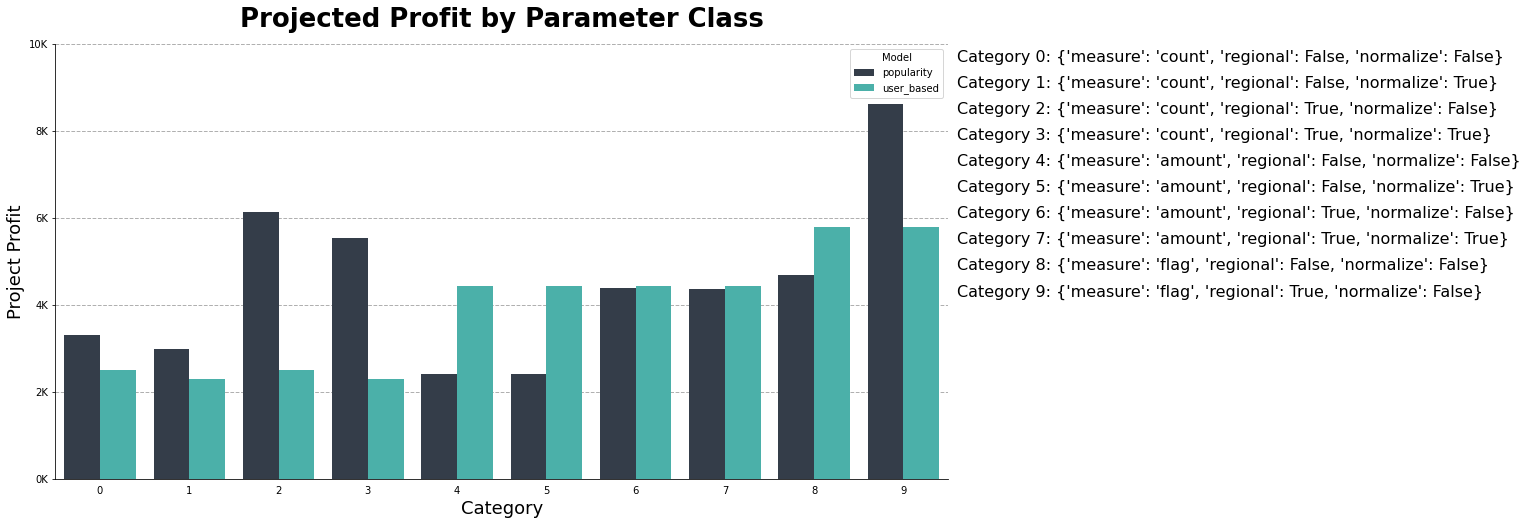

In [85]:
# Initialize figure.
fig, ax = plt.subplots(figsize=(16, 8))

# Create the barplot.
sns.barplot(x='category',
            y='projected_profit',
            hue='model',
            hue_order=['popularity', 'user_based'],
            data=parameter_comparison_df,
            palette=['#303D4C', '#3AC1B7'],
            zorder=3
           )

# Figure formatting.
sns.despine()
ax.set_title('Projected Profit by Parameter Class', fontsize=26, fontweight='bold', y=1.025)
ax.set_xlabel('Category', fontsize=18)
ax.set_ylabel('Project Profit', fontsize=18)
ax.set_ylim(0, 10)
ax.set_yticks(range(0, 10+1, 2))
ax.set_yticklabels([str(label) + 'K' for label in ax.get_yticks()])
ax.tick_params(axis='x', bottom=False) # Remove xticks.
ax.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0) # Set gridlines.
ax.legend(title='Model', bbox_to_anchor=(1, 1)) # Set legend position.

# Create labels to annotate the figure with.
labels = ['Category ' + str(row.Index) + ': ' + str({'measure': row.measure, 'regional': row.regional, 'normalize': row.normalize}) \
          for row in parameter_comparison_df.itertuples() if row.Index < 10]

# Annotate figure with labels.
for n, label in enumerate(labels):
    offset = n * 0.6
    ax.annotate(text=label, xy=(0, 0), xytext=(9.6, 9.6 - offset), fontsize=16)

plt.show()
plt.close()

- **Takeaway**
<br>

From the set of parameters tested above, we can conclude that:
 - For the value *counts* of the "measure" parameter, the popularity-based recommendations seems to outperform the user-based recommendations.
 - In all other measures, the user-based filtering approach appears to yield more overall profit than the popularity-based model, except for the regional *flag* value of the "measure" parameter.

<a class="anchor" id="concluding-remarks"></a>
# Concluding Remarks

Recommender systems can be very useful to expose a wide selection of products to a customer base. By leveraging historical purchase patterns, we have implemented here a user-based collaborative filtering approach to recommend products to a target customer based on what other, similar users have bought in the past.
As with all recommender systems, there are several inherent limitations, which we have nonetheless tried to mitigate in some way or for which we discuss possible improvements:

<br>

New and Infrequent Customers
- For new users coming into the database or for existing customers with very few or infrequent purchases it will be difficult to accurately recommend products, since they don't have clear purchase patterns that can be matched to other customers' in the database. This is known as the cold-start problem. In such cases, our recommender will always default to a popularity-based recommendation until these customers have accrued a minimum number of purchases, after which they become eligible for user-based recommendations. This minimum number of purchases can be easily modified to reflect the current reality of the business.

<br>

Seasonality & Preference Variability
- One of the assumptions of recommend systems is that purchases patterns in the customer's past inform about their preferences and these preferences will remain unaltered in the near future. However, as human beings, we continually grow and evolve, which also reflects on our tastes and preferences. Therefore, preferences expressed today may not align with the preferences of tomorrow. As such, we have endowed our recommender system with the capacity to ingest only those records from the database that correspond to the last N years of purchase data. In addition to this, because seasonality is another factor that greatly affects customer purchase behavior, we have also implemented the ability to return product recommendations based on purchase data from single, specific quarters. With these approaches, we strove to more faithfully capture the time-evolving nature of customer preference and thereby provide a more useful set of recommendations.

<br>

Regional Variability
- Multi-national businesses cater to many regions of the world with different habits and cultures. These differences may be translated into diverging purchase patterns across the same catalog of products. As such, our recommender is able to perform country-level assessment of purchase data, so as to return a set of recommendations that might more faithfully reflect the customers' purchase history in that country.

<br>

User-User Vector Optimization & Scaling
- In the current implementation, when a target customer is given to the recommender, the user-user similarity vector is calculated on the fly and then thrown away. Not only is this calculation time- and computationally expensive, it is also an inefficient way to generalize the whole process, especially as the customer base and the product catalog expand. A better solution would be to calculate the whole user-user matrix once and store it. Whenever a new transaction occurs, then only the row and column corresponding to that customer would need to be updated, and as new customers come in, their vector can be calculated and easily appended to the already existing matrix. With this architecture, whenever a set of recommendations is required, the system only needs to look up the pertinent values from the matrix instead of calculating them, which will result in a greatly reduced recommendation latency. 

<br>

Customer Similarity
- We have found customer similarity by calculating the cosine similarity score between the purchase vector of each customer pair. However, other algorithms that aim at finding similar entities, or neighbors, exist. K-Nearest Neighbors and K-Means are examples of such algorithms. It could be beneficial to compare the performance of the recommender using each approach, and assess their profitability. To this end, A/B testing across the customer base and testing each of the approaches could yield important insights regarding which model best fits the customer needs and, therefore, the business's interests.

<br>

Projected Profit
- Here we have shown and drawn conclusions about the computed projected profits regarding a single customer. This is of course insufficient as a generalization of our recommender's performance. Ideally, the recommender's parameter space would be tested against several different target customers and then aggregated to provide a more accurate and informative view of each model's estimated profitability.

Finally, we show below an architecture diagram summarizing the steps involved in the current implementation of our recommendation engine:
<br>

<img src="img/architecture_diagram.png" width="1200"/>